In [1]:

%pprint
import sys
if (osp.join(os.pardir, 'py') not in sys.path): sys.path.insert(1, osp.join(os.pardir, 'py'))

Pretty printing has been turned OFF


In [2]:

from FRVRS import (DataFrame, re, nu, re, display, concat, notnull)
import os
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt


# OSU dataset of Simulation Sessions, deidentified

Doug screened all of the **VOICE_COMMAND** and **VOICE_CAPTURE** lines and replaced any names with either Max or Jane, regardless of whether the name was that of the responder.

In [3]:

# Get all CSVs into one Data Frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    display(df.T)

(149166, 101)


109766  \
action_type                                    TOOL_HOVER   
action_tick                                       363383   
event_time                            2023-05-11 10:24:00   
session_uuid         c12f8355-5a14-4ccc-bde4-d8038cae9220   
file_name            c12f8355-5a14-4ccc-bde4-d8038cae9220   
scene_id                                              2   
tool_hover_type                                Tourniquet   
tool_hover_count                                      996   
tool_selected_type                                    NaN   
tool_selected_count                                   NaN   

                                                   41008   \
action_type                                    TOOL_HOVER   
action_tick                                       893467   
event_time                            2023-03-08 10:53:00   
session_uuid         89c48e7e-780f-4f1b-a846-fc0f4fd9841c   
file_name                                         Marty24   
scene_id                                              2   
tool_hover_type                                Tourniquet   
tool_hover_count                                      996   
tool_selected_type                                    NaN   
tool_selected_count                                   NaN   

                                                   112471  \
action_type                                 TOOL_SELECTED   
action_tick                                       599121   
event_time                            2023-05-11 12:10:00   
session_uuid         cc319a3d-a27d-44a2-a594-ff5cecd9ee9a   
file_name            cc319a3d-a27d-44a2-a594-ff5cecd9ee9a   
scene_id                                              2   
tool_hover_type                                       NaN   
tool_hover_count                                      NaN   
tool_selected_type                             Tourniquet   
tool_selected_count                                   996   

                                                   134769  
action_type                                    TOOL_HOVER  
action_tick                                       135209  
event_time                            2023-04-21 11:17:00  
session_uuid         8b5e760a-1f1a-4a28-bd8f-768bc5f216c6  
file_name                                           max13  
scene_id                                              1  
tool_hover_type                                Tourniquet  
tool_hover_count                                      998  
tool_selected_type                                    NaN  
tool_selected_count                                   NaN

In [4]:

# Explore what types of columns we have
df = nu.get_column_descriptions(frvrs_logs_df).sort_values('count_uniques')
columns_list = ['column_name', 'dtype', 'count_blanks', 'count_uniques', 'count_zeroes', 'min_value', 'max_value']
df[columns_list]

column_name            dtype  \
3                    voice_capture_command_description          float64   
56                        patient_engaged_health_level           object   
54                     s_a_l_t_waved_sort_command_text           object   
38                        injury_record_injury_treated           object   
39   injury_record_injury_treated_with_wrong_treatment           object   
..                                                 ...              ...   
8                                    teleport_location           object   
4                                 delta_to_next_action  timedelta64[ns]   
41                               voice_capture_message           object   
100                                        location_id           object   
0                                         action_tick            int64   

     count_blanks  count_uniques  count_zeroes               min_value  \
3          149166              1             0                     NaN   
56         146871              2             0                     100   
54         147405              2             0                   waved   
38         146114              2          3052                   False   
39         146114              2          3052                   False   
..            ...            ...           ...                     ...   
8          143488           3423             0       (-0.1, 0.0, -2.7)   
4          141112           4039             0  0 days 00:00:00.001000   
41         139051           5887             0    engine 1712 question   
100        114966           7156             0       (-0.1, 0.0, -2.7)   
0               0         120837             0                     171   

                                             max_value  
3                                                  NaN  
56                                                 100  
54                                               waved  
38                                               False  
39                                               False  
..                                                 ...  
8                                      (6.5, 0.0, 2.0)  
4                               0 days 00:05:03.311000  
41   your your scenario is you've been dispatched t...  
100                                    (6.5, 0.0, 2.0)  
0                                              7529672  

[101 rows x 7 columns]

In [6]:

# Investigate if any sequence is discernable by elapsed time and event time
frvrs_logs_df.sort_values(['action_tick', 'event_time']).tail(4).dropna(axis='columns', how='all').T

22976  \
action_type                                        TELEPORT   
action_tick                                        7525382   
event_time                              2023-05-16 18:20:00   
session_uuid           724fdf45-3165-43b8-b9ca-dc07102d2886   
file_name              724fdf45-3165-43b8-b9ca-dc07102d2886   
scene_id                                               17   
teleport_location                          (3.0, 0.0, -2.1)   
voice_capture_message                                   NaN   
location_id                                (3.0, 0.0, -2.1)   

                                                      22977  \
action_type                                   VOICE_CAPTURE   
action_tick                                        7525617   
event_time                              2023-05-16 18:20:00   
session_uuid           724fdf45-3165-43b8-b9ca-dc07102d2886   
file_name              724fdf45-3165-43b8-b9ca-dc07102d2886   
scene_id                                               17   
teleport_location                                       NaN   
voice_capture_message         and I think that was everyone   
location_id                                             NaN   

                                                      22978  \
action_type                                        TELEPORT   
action_tick                                        7526703   
event_time                              2023-05-16 18:20:00   
session_uuid           724fdf45-3165-43b8-b9ca-dc07102d2886   
file_name              724fdf45-3165-43b8-b9ca-dc07102d2886   
scene_id                                               17   
teleport_location                          (3.0, 0.0, -1.9)   
voice_capture_message                                   NaN   
location_id                                (3.0, 0.0, -1.9)   

                                                      22979  
action_type                                     SESSION_END  
action_tick                                        7529672  
event_time                              2023-05-16 18:20:00  
session_uuid           724fdf45-3165-43b8-b9ca-dc07102d2886  
file_name              724fdf45-3165-43b8-b9ca-dc07102d2886  
scene_id                                               17  
teleport_location                                       NaN  
voice_capture_message                                   NaN  
location_id                                             NaN

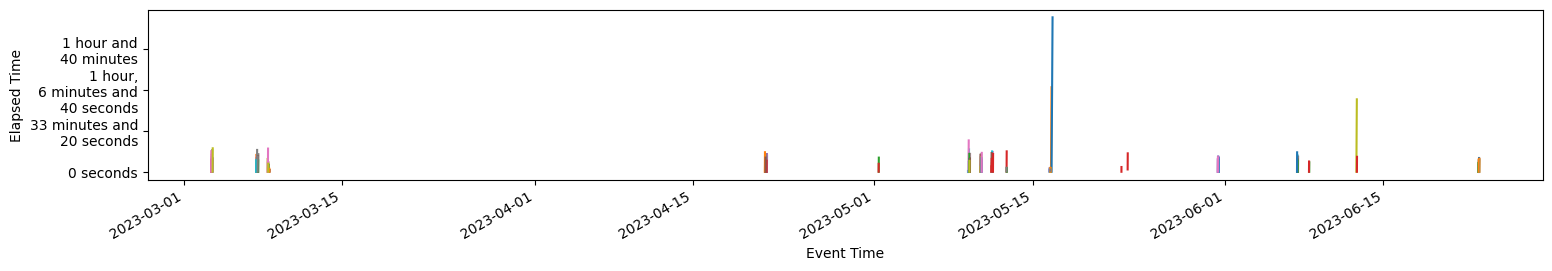

In [7]:

# Visualize the relationship between the event time and the elapsed time
from matplotlib.text import Text
import humanize
from datetime import timedelta

ax = plt.figure(figsize=(18, 2.5)).add_subplot(1, 1, 1)
def f(df):
    try:
        session_uuid = df['session_uuid'].unique().squeeze()
    except:
        session_uuid = df.iloc[0].T.iloc[3]
    df.sort_values(['event_time', 'action_tick']).set_index('event_time').action_tick.plot(ax=ax, label=session_uuid);
    ax.set_yticklabels([
        Text(0, -2000000.0, humanize.precisedelta(timedelta(milliseconds=-2000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(0, 0.0, humanize.precisedelta(timedelta(milliseconds=0.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(0, 2000000.0, humanize.precisedelta(timedelta(milliseconds=2000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(0, 4000000.0, humanize.precisedelta(timedelta(milliseconds=4000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(0, 6000000.0, humanize.precisedelta(timedelta(milliseconds=6000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(0, 8000000.0, humanize.precisedelta(timedelta(milliseconds=8000000.0)).replace(', ', ',\n').replace(' and ', ' and\n'))
    ]);
frvrs_logs_df.groupby('session_uuid').apply(f)
ax.set_xlabel('Event Time')
ax.set_ylabel('Elapsed Time');

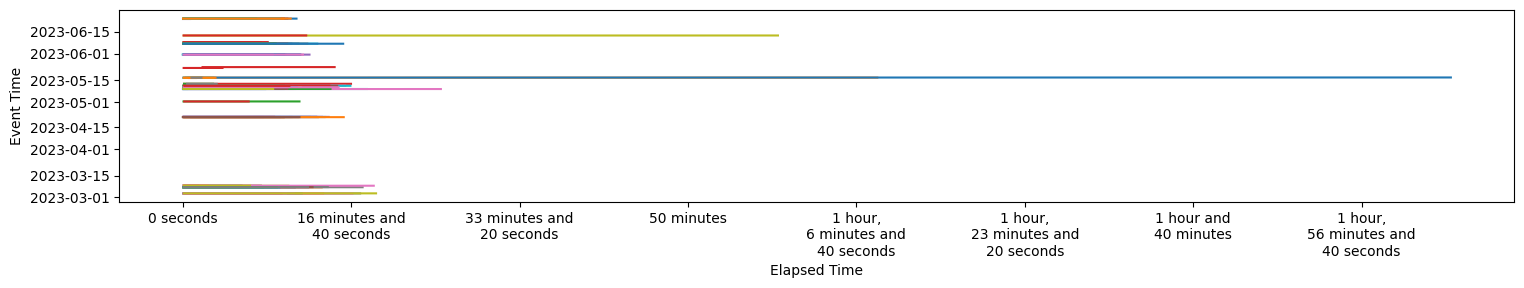

In [8]:

# Visualize the relationship between the elapsed time and the event time
ax = plt.figure(figsize=(18, 2.5)).add_subplot(1, 1, 1)
# tick_labels_set = set()
def f(df):
    try:
        session_uuid = df['session_uuid'].unique().squeeze()
    except:
        session_uuid = df.iloc[0].T.iloc[3]
    df.sort_values(['action_tick', 'event_time']).set_index('action_tick').event_time.plot(ax=ax, label=session_uuid);
    # tick_labels = ax.get_xticklabels()
    # tick_labels_set.add(str(tick_labels))
    ax.set_xticklabels([
        Text(-1000000.0, 0, humanize.precisedelta(timedelta(milliseconds=-1000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(0.0, 0, humanize.precisedelta(timedelta(milliseconds=0.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(1000000.0, 0, humanize.precisedelta(timedelta(milliseconds=1000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(2000000.0, 0, humanize.precisedelta(timedelta(milliseconds=2000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(3000000.0, 0, humanize.precisedelta(timedelta(milliseconds=3000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(4000000.0, 0, humanize.precisedelta(timedelta(milliseconds=4000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(5000000.0, 0, humanize.precisedelta(timedelta(milliseconds=5000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(6000000.0, 0, humanize.precisedelta(timedelta(milliseconds=6000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(7000000.0, 0, humanize.precisedelta(timedelta(milliseconds=7000000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(8000000.0, 0, humanize.precisedelta(timedelta(milliseconds=8000000.0)).replace(', ', ',\n').replace(' and ', ' and\n'))
    ]);
frvrs_logs_df.groupby('session_uuid').apply(f)
ax.set_xlabel('Elapsed Time')
ax.set_ylabel('Event Time');

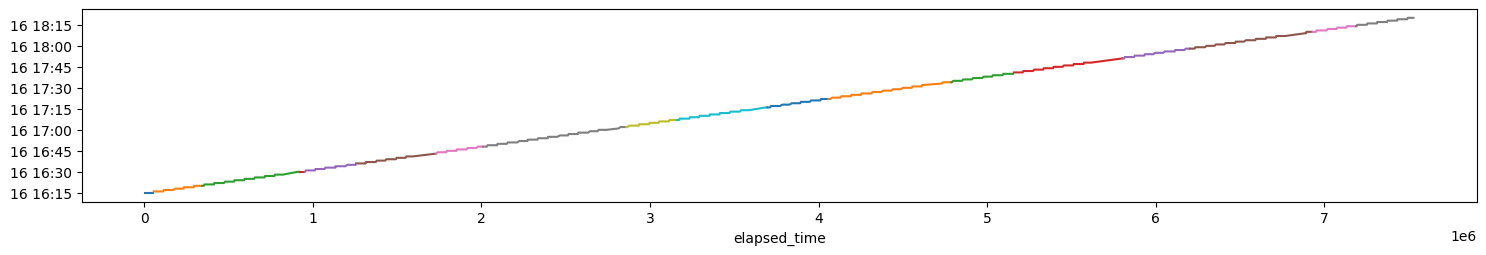

In [9]:

# Get the relationship between the session UUID and the scene
f = lambda df: df.sort_values(['action_tick', 'event_time']).set_index('action_tick').event_time.plot(ax=ax);
session_uuid = frvrs_logs_df.groupby(fu.scene_groupby_columns).count().sort_index(level=1).tail(1).index.get_level_values(0)[0]
mask_series = (frvrs_logs_df.session_uuid == session_uuid)
ax = plt.figure(figsize=(18, 2.5)).add_subplot(1, 1, 1)
_ = frvrs_logs_df[mask_series].groupby('scene_id').apply(f)


## Decision Points

<p>
    OSU and Big Bear: With the IRB approval (for the previous OSU dataset) in place, I would like to get working on the dataset asap. That means:
    <ul>
        <li>Getting it deidentified and sharable</li>
        <li>If there is general demographic information like gender or level of expertise that can be associated with the VR performance, that would be useful.</li>
        <li>Big Bear: once it is available to you, I want an exploratory analysis on decision points such that I can see the variance in responses to the same situation.</li>
        <li>For example, if there are 3 waving patients and the participant chooses to move toward one and assess them, I want to know the sim state (visual info. on each patient, distance, etc.) and then a breakdown of how many participants chose to move toward each patient.</li>
        <li>Similar for treatment options, for each patient present in the simulated environment, what is the variance in which treatment is applied</li>
         <li>Does it depend on ordr?</li>
          <li>Ting?</li>
           <li>Be creative and ask all the questions. The goal is to provide TA1 with this dataset if there is anything useful to be found in analyzing the decisions (not necessarily that we find results but that the data is in shape to ask these questions). Let me know if you need additional clarifiion   </l    i>
</</p>
ion.

In [10]:

# List the action types
frvrs_logs_df.action_type.value_counts().sort_index().to_frame()

count
action_type               
BAG_ACCESS            2180
BAG_CLOSED            2149
INJURY_RECORD         3052
INJURY_TREATED        1577
PATIENT_DEMOTED       1818
PATIENT_ENGAGED       2295
PATIENT_RECORD        2063
PULSE_TAKEN           3427
SESSION_END            256
SESSION_START          266
S_A_L_T_WALKED        2725
S_A_L_T_WALK_IF_CAN   4567
S_A_L_T_WAVED         1761
S_A_L_T_WAVE_IF_CAN   2147
TAG_APPLIED           1819
TAG_DISCARDED          533
TAG_SELECTED          2353
TELEPORT              5678
TOOL_APPLIED          1818
TOOL_DISCARDED        1655
TOOL_HOVER           89733
TOOL_SELECTED         2263
VOICE_CAPTURE        10115
VOICE_COMMAND         2916

In [64]:

# Display a dataset of DM actions
mask_series = frvrs_logs_df.action_type.isin(['INJURY_TREATED', 'PATIENT_ENGAGED'] + fu.responder_negotiations_list)
columns_list = [
    'action_type', 'action_tick', 'event_time', 'tag_applied_type', 'tool_applied_type', 'injury_treated_id',
    'patient_id', 'location_id', 'scene_id'
               ]
for session_uuid, session_df in frvrs_logs_df.groupby('session_uuid'):
    print(
        f'rows: {session_df.shape[0]}, action_type: {len(session_df.action_type.unique())},'
        f' action_tick: {len(session_df.action_tick.unique())}, event_time: {len(session_df.event_time.unique())},'
        f' patient_id: {len(session_df.patient_id.unique())}, location_id: {len(session_df.location_id.unique())},'
        f' scene_id: {len(session_df.scene_id.unique())}'
    )
    df = session_df.sort_values(['action_tick', 'event_time'])[mask_series][columns_list]
    for patient_id, patient_df in df.groupby('patient_id'):
        display(patient_df.dropna(axis='columns', how='all'))
    break

rows: 1120, action_type: 24, action_tick: 957, event_time: 12, patient_id: 17, location_id: 117, scene_id: 1


action_type  action_tick          event_time tag_applied_type  \
51240  PATIENT_ENGAGED        299882 2023-06-07 10:30:00              NaN   
51241      PULSE_TAKEN        302752 2023-06-07 10:30:00              NaN   
51243      PULSE_TAKEN        304272 2023-06-07 10:30:00              NaN   
51247      TAG_APPLIED        313242 2023-06-07 10:31:00            black   

       patient_id       location_id  scene_id  
51240  Bob_0 Root  (-1.7, 0.0, 5.7)           0  
51241  Bob_0 Root               NaN           0  
51243  Bob_0 Root               NaN           0  
51247  Bob_0 Root               NaN           0

action_type  action_tick          event_time tag_applied_type  \
51269  PATIENT_ENGAGED        333753 2023-06-07 10:31:00              NaN   
51272      PULSE_TAKEN        343821 2023-06-07 10:31:00              NaN   
51276      TAG_APPLIED        349772 2023-06-07 10:31:00             gray   
51289     TOOL_APPLIED        357157 2023-06-07 10:31:00              NaN   

      tool_applied_type   patient_id      location_id  scene_id  
51269               NaN  Gary_1 Root  (1.6, 0.0, 7.6)           0  
51272               NaN  Gary_1 Root              NaN           0  
51276               NaN  Gary_1 Root              NaN           0  
51289    Gauze_Dressing  Gary_1 Root              NaN           0

action_type  action_tick          event_time tag_applied_type  \
50970  PATIENT_ENGAGED        230961 2023-06-07 10:29:00              NaN   
50980      PULSE_TAKEN        239121 2023-06-07 10:29:00              NaN   
50981      PULSE_TAKEN        240341 2023-06-07 10:29:00              NaN   
51206   INJURY_TREATED        250467 2023-06-07 10:30:00              NaN   
51217      TAG_APPLIED        281683 2023-06-07 10:30:00              red   

      injury_treated_id   patient_id      location_id  scene_id  
50970               NaN  Gary_3 Root  (0.4, 0.0, 1.7)           0  
50980               NaN  Gary_3 Root              NaN           0  
50981               NaN  Gary_3 Root              NaN           0  
51206  R Chest Collapse  Gary_3 Root  (0.0, 0.0, 0.0)           0  
51217               NaN  Gary_3 Root              NaN           0

action_type  action_tick          event_time tag_applied_type  \
51674  PATIENT_ENGAGED        487539 2023-06-07 10:34:00              NaN   
51682      TAG_APPLIED        498078 2023-06-07 10:34:00            green   

        patient_id      location_id  scene_id  
51674  Gary_9 Root  (2.9, 0.0, 9.1)           0  
51682  Gary_9 Root              NaN           0

action_type  action_tick          event_time tag_applied_type  \
51742  PATIENT_ENGAGED        553755 2023-06-07 10:35:00              NaN   
51753     TOOL_APPLIED        568833 2023-06-07 10:35:00              NaN   
51754      PULSE_TAKEN        569049 2023-06-07 10:35:00              NaN   
51764     TOOL_APPLIED        571824 2023-06-07 10:35:00              NaN   
51766      TAG_APPLIED        576501 2023-06-07 10:35:00           yellow   
51776     TOOL_APPLIED        586041 2023-06-07 10:35:00              NaN   
51783     TOOL_APPLIED        591896 2023-06-07 10:35:00              NaN   
51784      PULSE_TAKEN        592262 2023-06-07 10:35:00              NaN   
51793   INJURY_TREATED        594913 2023-06-07 10:35:00              NaN   
51794     TOOL_APPLIED        594913 2023-06-07 10:35:00              NaN   

      tool_applied_type injury_treated_id     patient_id       location_id  \
51742               NaN               NaN  Gloria_6 Root  (-1.2, 0.0, 3.1)   
51753    Gauze_Dressing               NaN  Gloria_6 Root               NaN   
51754               NaN               NaN  Gloria_6 Root               NaN   
51764        Tourniquet               NaN  Gloria_6 Root               NaN   
51766               NaN               NaN  Gloria_6 Root               NaN   
51776        Tourniquet               NaN  Gloria_6 Root               NaN   
51783    Gauze_Dressing               NaN  Gloria_6 Root               NaN   
51784               NaN               NaN  Gloria_6 Root               NaN   
51793               NaN   R Calf Shrapnel  Gloria_6 Root  (-1.1, 0.2, 3.2)   
51794    Gauze_Dressing               NaN  Gloria_6 Root               NaN   

       scene_id  
51742           0  
51753           0  
51754           0  
51764           0  
51766           0  
51776           0  
51783           0  
51784           0  
51793           0  
51794           0

action_type  action_tick          event_time tag_applied_type  \
51707  PATIENT_ENGAGED        522805 2023-06-07 10:34:00              NaN   
51712      TAG_APPLIED        530258 2023-06-07 10:34:00            green   
51732   INJURY_TREATED        535402 2023-06-07 10:34:00              NaN   
51733     TOOL_APPLIED        535402 2023-06-07 10:34:00              NaN   
51734      PULSE_TAKEN        535418 2023-06-07 10:34:00              NaN   

      tool_applied_type     injury_treated_id     patient_id  \
51707               NaN                   NaN  Gloria_8 Root   
51712               NaN                   NaN  Gloria_8 Root   
51732               NaN  L Forearm Laceration  Gloria_8 Root   
51733    Gauze_Dressing                   NaN  Gloria_8 Root   
51734               NaN                   NaN  Gloria_8 Root   

            location_id  scene_id  
51707  (2.8, 0.0, -3.6)           0  
51712               NaN           0  
51732  (2.8, 0.9, -3.3)           0  
51733               NaN           0  
51734               NaN           0

action_type  action_tick          event_time tag_applied_type  \
51686  PATIENT_ENGAGED        507953 2023-06-07 10:34:00              NaN   
51692      TAG_APPLIED        520751 2023-06-07 10:34:00            green   

          patient_id       location_id  scene_id  
51686  Helga_10 Root  (4.6, 0.0, -3.2)           0  
51692  Helga_10 Root               NaN           0

action_type  action_tick          event_time tag_applied_type  \
51294      PULSE_TAKEN        371139 2023-06-07 10:32:00              NaN   
51295  PATIENT_ENGAGED        371841 2023-06-07 10:32:00              NaN   
51329   INJURY_TREATED        378842 2023-06-07 10:32:00              NaN   
51330     TOOL_APPLIED        378842 2023-06-07 10:32:00              NaN   
51337      TAG_APPLIED        392014 2023-06-07 10:32:00              red   
51338      PULSE_TAKEN        392080 2023-06-07 10:32:00              NaN   
51339      PULSE_TAKEN        392198 2023-06-07 10:32:00              NaN   

      tool_applied_type  injury_treated_id   patient_id      location_id  \
51294               NaN                NaN  Lily_2 Root              NaN   
51295               NaN                NaN  Lily_2 Root  (3.0, 0.0, 4.5)   
51329               NaN  R Shin Amputation  Lily_2 Root  (3.3, 0.1, 4.3)   
51330        Tourniquet                NaN  Lily_2 Root              NaN   
51337               NaN                NaN  Lily_2 Root              NaN   
51338               NaN                NaN  Lily_2 Root              NaN   
51339               NaN                NaN  Lily_2 Root              NaN   

       scene_id  
51294           0  
51295           0  
51329           0  
51330           0  
51337           0  
51338           0  
51339           0

action_type  action_tick          event_time tag_applied_type  \
51799  PATIENT_ENGAGED        608419 2023-06-07 10:36:00              NaN   
51808   INJURY_TREATED        623172 2023-06-07 10:36:00              NaN   
51809     TOOL_APPLIED        623172 2023-06-07 10:36:00              NaN   
51810      PULSE_TAKEN        624382 2023-06-07 10:36:00              NaN   
51812      TAG_APPLIED        629496 2023-06-07 10:36:00              red   

      tool_applied_type injury_treated_id   patient_id      location_id  \
51799               NaN               NaN  Lily_4 Root  (1.2, 0.0, 6.2)   
51808               NaN   L Side Puncture  Lily_4 Root  (0.9, 0.2, 6.5)   
51809        Gauze_Pack               NaN  Lily_4 Root              NaN   
51810               NaN               NaN  Lily_4 Root              NaN   
51812               NaN               NaN  Lily_4 Root              NaN   

       scene_id  
51799           0  
51808           0  
51809           0  
51810           0  
51812           0

action_type  action_tick          event_time tag_applied_type  \
50857  PATIENT_ENGAGED        145078 2023-06-07 10:28:00              NaN   
50886   INJURY_TREATED        160026 2023-06-07 10:28:00              NaN   
50887     TOOL_APPLIED        160026 2023-06-07 10:28:00              NaN   
50891      TAG_APPLIED        167410 2023-06-07 10:28:00            green   

      tool_applied_type     injury_treated_id   patient_id       location_id  \
50857               NaN                   NaN  Mike_0 Root  (4.7, 0.0, -3.3)   
50886               NaN  R Forearm Laceration  Mike_0 Root  (4.7, 1.0, -3.0)   
50887    Gauze_Dressing                   NaN  Mike_0 Root               NaN   
50891               NaN                   NaN  Mike_0 Root               NaN   

       scene_id  
50857           0  
50886           0  
50887           0  
50891           0

action_type  action_tick          event_time tag_applied_type  \
50804  PATIENT_ENGAGED         69080 2023-06-07 10:27:00              NaN   
50806      PULSE_TAKEN         72904 2023-06-07 10:27:00              NaN   
50808      PULSE_TAKEN         75644 2023-06-07 10:27:00              NaN   
50820   INJURY_TREATED         81426 2023-06-07 10:27:00              NaN   
50821     TOOL_APPLIED         81427 2023-06-07 10:27:00              NaN   
50823      TAG_APPLIED         86304 2023-06-07 10:27:00           yellow   

      tool_applied_type   injury_treated_id   patient_id      location_id  \
50804               NaN                 NaN  Mike_1 Root  (2.9, 0.0, 0.1)   
50806               NaN                 NaN  Mike_1 Root              NaN   
50808               NaN                 NaN  Mike_1 Root              NaN   
50820               NaN  L Thigh Laceration  Mike_1 Root  (2.8, 0.3, 0.3)   
50821        Tourniquet                 NaN  Mike_1 Root              NaN   
50823               NaN                 NaN  Mike_1 Root              NaN   

       scene_id  
50804           0  
50806           0  
50808           0  
50820           0  
50821           0  
50823           0

action_type  action_tick          event_time tag_applied_type  \
50827  PATIENT_ENGAGED        103663 2023-06-07 10:27:00              NaN   
50844   INJURY_TREATED        122877 2023-06-07 10:27:00              NaN   
50845     TOOL_APPLIED        122877 2023-06-07 10:27:00              NaN   
50849      TAG_APPLIED        131396 2023-06-07 10:28:00              red   
50851      PULSE_TAKEN        137543 2023-06-07 10:28:00              NaN   
50852      PULSE_TAKEN        138981 2023-06-07 10:28:00              NaN   
50853      PULSE_TAKEN        139181 2023-06-07 10:28:00              NaN   

      tool_applied_type    injury_treated_id   patient_id       location_id  \
50827               NaN                  NaN  Mike_2 Root  (2.6, 0.0, -3.8)   
50844               NaN  L Shoulder Puncture  Mike_2 Root  (2.5, 0.5, -4.0)   
50845        Gauze_Pack                  NaN  Mike_2 Root               NaN   
50849               NaN                  NaN  Mike_2 Root               NaN   
50851               NaN                  NaN  Mike_2 Root               NaN   
50852               NaN                  NaN  Mike_2 Root               NaN   
50853               NaN                  NaN  Mike_2 Root               NaN   

       scene_id  
50827           0  
50844           0  
50845           0  
50849           0  
50851           0  
50852           0  
50853           0

action_type  action_tick          event_time tag_applied_type  \
50776  PATIENT_ENGAGED         35915 2023-06-07 10:26:00              NaN   
50795   INJURY_TREATED         48784 2023-06-07 10:26:00              NaN   
50797      PULSE_TAKEN         50952 2023-06-07 10:26:00              NaN   
50800      TAG_APPLIED         58404 2023-06-07 10:26:00              red   

      injury_treated_id   patient_id      location_id  scene_id  
50776               NaN  Mike_3 Root  (3.2, 0.0, 4.3)           0  
50795  R Chest Collapse  Mike_3 Root  (0.0, 0.0, 0.0)           0  
50797               NaN  Mike_3 Root              NaN           0  
50800               NaN  Mike_3 Root              NaN           0

action_type  action_tick          event_time tag_applied_type  \
51346  PATIENT_ENGAGED        405214 2023-06-07 10:32:00              NaN   
51353   INJURY_TREATED        419723 2023-06-07 10:32:00              NaN   
51354     TOOL_APPLIED        419723 2023-06-07 10:32:00              NaN   
51356      TAG_APPLIED        426606 2023-06-07 10:33:00           yellow   
51358      PULSE_TAKEN        428444 2023-06-07 10:33:00              NaN   
51363      PULSE_TAKEN        434374 2023-06-07 10:33:00              NaN   
51484     TOOL_APPLIED        446873 2023-06-07 10:33:00              NaN   
51517   INJURY_TREATED        453221 2023-06-07 10:33:00              NaN   
51518     TOOL_APPLIED        453221 2023-06-07 10:33:00              NaN   
51667      TAG_APPLIED        471648 2023-06-07 10:33:00              red   

      tool_applied_type   injury_treated_id   patient_id      location_id  \
51346               NaN                 NaN  Mike_5 Root  (2.7, 0.0, 2.3)   
51353               NaN  R Thigh Laceration  Mike_5 Root  (3.0, 0.3, 2.2)   
51354        Tourniquet                 NaN  Mike_5 Root              NaN   
51356               NaN                 NaN  Mike_5 Root              NaN   
51358               NaN                 NaN  Mike_5 Root              NaN   
51363               NaN                 NaN  Mike_5 Root              NaN   
51484        Gauze_Pack                 NaN  Mike_5 Root              NaN   
51517               NaN     R Side Puncture  Mike_5 Root  (2.3, 0.2, 2.5)   
51518        Gauze_Pack                 NaN  Mike_5 Root              NaN   
51667               NaN                 NaN  Mike_5 Root              NaN   

       scene_id  
51346           0  
51353           0  
51354           0  
51356           0  
51358           0  
51363           0  
51484           0  
51517           0  
51518           0  
51667           0

action_type  action_tick          event_time tag_applied_type  \
51815  PATIENT_ENGAGED        647792 2023-06-07 10:36:00              NaN   
51834   INJURY_TREATED        656277 2023-06-07 10:36:00              NaN   
51835     TOOL_APPLIED        656277 2023-06-07 10:36:00              NaN   
51846   INJURY_TREATED        661238 2023-06-07 10:36:00              NaN   
51847     TOOL_APPLIED        661238 2023-06-07 10:36:00              NaN   
51849      TAG_APPLIED        667721 2023-06-07 10:37:00              red   

      tool_applied_type  injury_treated_id   patient_id      location_id  \
51815               NaN                NaN  Mike_7 Root  (1.3, 0.0, 3.4)   
51834               NaN   L Thigh Puncture  Mike_7 Root  (0.7, 0.1, 3.5)   
51835        Tourniquet                NaN  Mike_7 Root              NaN   
51846               NaN  R Calf Laceration  Mike_7 Root  (1.3, 0.2, 3.8)   
51847    Gauze_Dressing                NaN  Mike_7 Root              NaN   
51849               NaN                NaN  Mike_7 Root              NaN   

       scene_id  
51815           0  
51834           0  
51835           0  
51846           0  
51847           0  
51849           0

action_type  action_tick          event_time tool_applied_type  \
50796  TOOL_APPLIED         48784 2023-06-07 10:26:00            Needle   
51207  TOOL_APPLIED        250467 2023-06-07 10:30:00            Needle   

                 patient_id  scene_id  
50796  Needle_Decomp(Clone)           0  
51207  Needle_Decomp(Clone)           0

In [59]:

frvrs_logs_df.loc[51217].dropna(axis='index', how='all').to_frame()

51217
action_type                                      TAG_APPLIED
action_tick                                          281683
event_time                               2023-06-07 10:30:00
session_uuid            04882754-51a0-4e5b-9617-b200e3609116
file_name               04882754-51a0-4e5b-9617-b200e3609116
tag_applied_patient_id                           Gary_3 Root
tag_applied_type                                         red
scene_id                                                 0
patient_id                                       Gary_3 Root

In [ ]:

# List how many session end events are in each session
mask_series = (frvrs_logs_df.action_type == 'SESSION_END')
frvrs_logs_df[mask_series].session_uuid.value_counts()


### Simulated Patients ("Root" References)

In [11]:

# Investigate the presence of Root references
root_regex = re.compile('(Mike|Gary|Helga|Bob|Gloria|Lily)(_(0|1|2|3|4|5|6|7|8|9|10))? Root')
clean_csvs_srs = frvrs_logs_df.applymap(lambda x: bool(root_regex.search(str(x))), na_action='ignore').sum()
columns_list = clean_csvs_srs[clean_csvs_srs != 0].index.tolist()
df = DataFrame([])
for cn in columns_list:
    mask_series = frvrs_logs_df[cn].map(lambda x: bool(root_regex.search(str(x))))
    df = concat([df, frvrs_logs_df[mask_series].iloc[0:1]], axis='index')
df.head(5).dropna(axis='columns', how='all').T

2   \
action_type                                                             PATIENT_DEMOTED   
action_tick                                                                      21602   
event_time                                                          2023-05-16 14:59:00   
session_uuid                                       06574b6f-ab02-432c-9a65-7b031218a270   
file_name                                          06574b6f-ab02-432c-9a65-7b031218a270   
scene_id                                                                            0   
patient_demoted_health_level                                                        100   
patient_demoted_health_time_remaining                                          Infinity   
patient_demoted_patient_id                                                          Mike_1 Root   
patient_demoted_position                                                (2.7, 0.0, 0.1)   
patient_demoted_rotation                                          (0.0, 0.7, 0.0, -0.7)   
patient_demoted_salt                                                            DELAYED   
patient_demoted_sort                                                              waver   
patient_demoted_pulse                                                            normal   
patient_demoted_breath                                                           normal   
patient_demoted_hearing                                                          normal   
patient_demoted_mood                                                              upset   
patient_demoted_pose                                                           recovery   
patient_record_health_level                                                         NaN   
patient_record_health_time_remaining                                                NaN   
patient_record_patient_id                                                                   NaN   
patient_record_position                                                             NaN   
patient_record_rotation                                                             NaN   
patient_record_salt                                                                 NaN   
patient_record_sort                                                                 NaN   
patient_record_pulse                                                                NaN   
patient_record_breath                                                               NaN   
patient_record_hearing                                                              NaN   
patient_record_mood                                                                 NaN   
patient_record_pose                                                                 NaN   
injury_record_id                                                                    NaN   
injury_record_patient_id                                                            NaN   
injury_record_required_procedure                                                    NaN   
injury_record_severity                                                              NaN   
injury_record_body_region                                                           NaN   
injury_record_injury_treated                                                        NaN   
injury_record_injury_treated_with_wrong_treatment                                   NaN   
injury_record_injury_injury_locator                                                 NaN   
s_a_l_t_walk_if_can_sort_location                                                   NaN   
s_a_l_t_walk_if_can_sort_command_text                                               NaN   
s_a_l_t_walk_if_can_patient_id                                                      NaN   
s_a_l_t_walked_sort_location                                                        NaN   
s_a_l_t_walked_sort_command_text                                                    NaN   
s_a_l_t_walked_patient_id                                           

In [12]:

# Make a list of all Root references
references_list = []
for cn in columns_list:
    mask_series = frvrs_logs_df[cn].map(lambda x: bool(root_regex.search(str(x))))
    references_list.extend(frvrs_logs_df[mask_series][cn].unique().tolist())
print(columns_list, set(references_list))

['patient_demoted_patient_id', 'patient_record_patient_id', 'injury_record_patient_id', 's_a_l_t_walk_if_can_patient_id', 's_a_l_t_walked_patient_id', 's_a_l_t_wave_if_can_patient_id', 's_a_l_t_waved_patient_id', 'patient_engaged_patient_id', 'pulse_taken_patient_id', 'injury_treated_patient_id', 'tag_applied_patient_id', 'tool_applied_patient_id', 'patient_id'] {'Gary_5 Root', 'Helga_9 Root', 'Gloria_8 Root', 'Bob_7 Root', 'Helga_6 Root', 'Gary_3 Root', 'Mike_2 Root', 'Lily_2 Root', 'Mike_9 Root', 'Mike_7 Root', 'Helga_0 Root', 'Gary_2 Root', 'Mike_1 Root', 'Lily_0 Root', 'Mike_10 Root', 'Mike_0 Root', 'Mike_3 Root', 'Lily_4 Root', 'Lily_7 Root', 'Gary_1 Root', 'Bob_4 Root', 'Lily_5 Root', 'Helga_10 Root', 'Mike_5 Root', 'Bob_0 Root', 'Mike_8 Root', 'Lily_1 Root', 'Gloria_6 Root', 'Mike_4 Root', 'Bob_10 Root', 'Mike_6 Root', 'Gary_9 Root', 'Mike Root', 'Gloria_2 Root', 'Bob_1 Root'}



### Patient Engagement

In [ ]:

# List how many patient engagement events are in each session
mask_series = (frvrs_logs_df.action_type == 'PATIENT_ENGAGED')
srs = frvrs_logs_df[mask_series].session_uuid.value_counts()
min_session_uuid = srs.index[-1]
max_session_uuid = srs.index[0]

In [ ]:

# Get the event times where the action_type column is equal to PATIENT_ENGAGED
mask_series = (frvrs_logs_df.session_uuid == min_session_uuid) & (frvrs_logs_df.action_type == 'PATIENT_ENGAGED')
engaged_idx = frvrs_logs_df[mask_series].index.iloc[0]
scene_id = frvrs_logs_df.loc[engaged_idx, 'scene_id']

# Get the patient name
mask_series = (frvrs_logs_df.index == engaged_idx)
patient_name = frvrs_logs_df[mask_series].patient_engaged_patient_id.squeeze()
mask_series = (frvrs_logs_df.scene_id == scene_id) & (frvrs_logs_df.index < engaged_idx)
mask_series &= (frvrs_logs_df.patient_engaged_patient_id == patient_name)
patient_idx = frvrs_logs_df[mask_series].index.tolist()[-1]

# Get the rows where the event_time is the same
mask_series = (frvrs_logs_df.index <= engaged_idx) & (frvrs_logs_df.index >= patient_idx)
actions_list = frvrs_logs_df[mask_series].action_type.tolist()
print(nu.conjunctify_nouns(actions_list))
columns_list = [
    'action_type', 'action_tick', 'event_time', 'patient_engaged_health_level', 'patient_engaged_health_time_remaining',
    'patient_engaged_patient_id', 'patient_engaged_position', 'patient_engaged_rotation', 'patient_engaged_salt', 'patient_engaged_sort',
    'patient_engaged_pulse', 'patient_engaged_breath', 'patient_engaged_hearing', 'patient_engaged_mood', 'patient_engaged_pose'
]
display(frvrs_logs_df[mask_series][columns_list].T)


### Voice Commands

In [15]:

# List the different voice commands
mask_series = (frvrs_logs_df.action_type == 'VOICE_COMMAND')
frvrs_logs_df[mask_series].voice_command_message.value_counts().sort_index().to_frame()

count
voice_command_message       
anywhere else             80
are you hurt             730
can you hear              49
hold still                 7
lay down                  66
modbutton groan           41
modbutton im okay        136
modbutton no             177
modbutton yes             84
reveal injury            130
sit up/down               65
stand up                 118
walk to the safe area    605
wave if you can          566
what is your name         38
where are you             24

In [16]:

[cn for cn in frvrs_logs_df.columns if cn.startswith('voice_command_')]

['voice_command_message', 'voice_command_command_description']

In [17]:

def examine_events(command_str):
    
    # Get the sequence of the records after the voice_command_message column is equal to command_str
    df = frvrs_logs_df.sort_values(['event_time', 'action_tick']).reset_index(drop=False)
    mask_series = (df['voice_command_message'] == command_str)
    sessions_list = df[mask_series].session_uuid.tolist()[:5]
    
    # Investigate events in each session
    columns_list = ['action_type', 'action_tick', 'event_time', 'voice_command_message', 'voice_command_command_description']
    def f(df):
        
        # Get the event times where the voice_command_message column is equal to command_str
        mask_series = (df.voice_command_message == command_str)
        idx = df[mask_series].index.iloc[0]
        local_time_group = df.loc[idx, 'scene_id']
    
        # Get the rows where the event_time is the same
        mask_series = (df.scene_id == local_time_group) & (df.index >= idx)
        display(df[mask_series].head(10)[columns_list])
        
    # Examine the first 5 session UUIDs
    mask_series = frvrs_logs_df.session_uuid.isin(sessions_list)
    df = frvrs_logs_df[mask_series].groupby(['session_uuid']).apply(f)

In [18]:

# "Are you hurt?" Events
examine_events('are you hurt')

action_type  action_tick          event_time voice_command_message  \
26963  VOICE_COMMAND        262353 2023-03-03 10:27:00          are you hurt   
26964     BAG_ACCESS        263789 2023-03-03 10:27:00                   NaN   
26965     TOOL_HOVER        265946 2023-03-03 10:27:00                   NaN   
26966     TOOL_HOVER        265963 2023-03-03 10:27:00                   NaN   
26967     TOOL_HOVER        265980 2023-03-03 10:27:00                   NaN   
26968     TOOL_HOVER        265995 2023-03-03 10:27:00                   NaN   
26969     TOOL_HOVER        266013 2023-03-03 10:27:00                   NaN   
26970     TOOL_HOVER        266030 2023-03-03 10:27:00                   NaN   
26971     TOOL_HOVER        266047 2023-03-03 10:27:00                   NaN   
26972     TOOL_HOVER        266063 2023-03-03 10:27:00                   NaN   

      voice_command_command_description  
26963                      are you hurt  
26964                               NaN  
26965                               NaN  
26966                               NaN  
26967                               NaN  
26968                               NaN  
26969                               NaN  
26970                               NaN  
26971                               NaN  
26972                               NaN

In [19]:

# "Walk to the safe area" Events
examine_events('walk to the safe area')

action_type  action_tick          event_time  \
35654        VOICE_COMMAND         25676 2023-03-03 10:48:00   
35655  S_A_L_T_WALK_IF_CAN         25678 2023-03-03 10:48:00   
35656       S_A_L_T_WALKED         25678 2023-03-03 10:48:00   
35657  S_A_L_T_WALK_IF_CAN         25679 2023-03-03 10:48:00   
35658  S_A_L_T_WALK_IF_CAN         25679 2023-03-03 10:48:00   
35659       S_A_L_T_WALKED         25679 2023-03-03 10:48:00   
35660        VOICE_CAPTURE         41729 2023-03-03 10:48:00   
35661        VOICE_COMMAND         41729 2023-03-03 10:48:00   
35662  S_A_L_T_WAVE_IF_CAN         41729 2023-03-03 10:48:00   
35663        S_A_L_T_WAVED         41731 2023-03-03 10:48:00   

       voice_command_message voice_command_command_description  
35654  walk to the safe area                              walk  
35655                    NaN                               NaN  
35656                    NaN                               NaN  
35657                    NaN                               NaN  
35658                    NaN                               NaN  
35659                    NaN                               NaN  
35660                    NaN                               NaN  
35661        wave if you can                              wave  
35662                    NaN                               NaN  
35663                    NaN                               NaN

action_type  action_tick          event_time  \
41944        VOICE_COMMAND         18659 2023-03-03 11:03:00   
41945  S_A_L_T_WALK_IF_CAN         18661 2023-03-03 11:03:00   
41946       S_A_L_T_WALKED         18661 2023-03-03 11:03:00   
41947  S_A_L_T_WALK_IF_CAN         18662 2023-03-03 11:03:00   
41948  S_A_L_T_WALK_IF_CAN         18662 2023-03-03 11:03:00   
41949       S_A_L_T_WALKED         18662 2023-03-03 11:03:00   
41950             TELEPORT         18676 2023-03-03 11:03:00   
41951             TELEPORT         19930 2023-03-03 11:03:00   
41952             TELEPORT         20714 2023-03-03 11:03:00   
41953      PATIENT_ENGAGED         21283 2023-03-03 11:03:00   

       voice_command_message voice_command_command_description  
41944  walk to the safe area                              walk  
41945                    NaN                               NaN  
41946                    NaN                               NaN  
41947                    NaN                               NaN  
41948                    NaN                               NaN  
41949                    NaN                               NaN  
41950                    NaN                               NaN  
41951                    NaN                               NaN  
41952                    NaN                               NaN  
41953                    NaN                               NaN

action_type  action_tick          event_time  \
26416        VOICE_COMMAND         51865 2023-03-03 10:23:00   
26417  S_A_L_T_WALK_IF_CAN         51867 2023-03-03 10:23:00   
26418       S_A_L_T_WALKED         51867 2023-03-03 10:23:00   
26419  S_A_L_T_WALK_IF_CAN         51867 2023-03-03 10:23:00   
26420  S_A_L_T_WALK_IF_CAN         51867 2023-03-03 10:23:00   
26421       S_A_L_T_WALKED         51867 2023-03-03 10:23:00   
26422      PATIENT_ENGAGED         54232 2023-03-03 10:23:00   
26423             TELEPORT         56622 2023-03-03 10:23:00   
26424             TELEPORT         64806 2023-03-03 10:24:00   
26425        VOICE_CAPTURE         73747 2023-03-03 10:24:00   

       voice_command_message voice_command_command_description  
26416  walk to the safe area                              walk  
26417                    NaN                               NaN  
26418                    NaN                               NaN  
26419                    NaN                               NaN  
26420                    NaN                               NaN  
26421                    NaN                               NaN  
26422                    NaN                               NaN  
26423                    NaN                               NaN  
26424                    NaN                               NaN  
26425                    NaN                               NaN

In [20]:

# "Modbutton I'm OK" Events
examine_events('modbutton im okay')

action_type  action_tick          event_time voice_command_message  \
44757  VOICE_COMMAND        763303 2023-03-03 11:30:00     modbutton im okay   
44758  VOICE_CAPTURE        768531 2023-03-03 11:30:00                   NaN   
44759  VOICE_COMMAND        768533 2023-03-03 11:30:00          modbutton no   
44760     TOOL_HOVER        771787 2023-03-03 11:30:00                   NaN   
44761     TOOL_HOVER        771807 2023-03-03 11:30:00                   NaN   
44762     TOOL_HOVER        771821 2023-03-03 11:30:00                   NaN   
44763     TOOL_HOVER        771837 2023-03-03 11:30:00                   NaN   
44764     TOOL_HOVER        771857 2023-03-03 11:30:00                   NaN   
44765     TOOL_HOVER        771871 2023-03-03 11:30:00                   NaN   
44766     TOOL_HOVER        771891 2023-03-03 11:30:00                   NaN   

      voice_command_command_description  
44757                 modbutton im okay  
44758                               NaN  
44759                      modbutton no  
44760                               NaN  
44761                               NaN  
44762                               NaN  
44763                               NaN  
44764                               NaN  
44765                               NaN  
44766                               NaN

action_type  action_tick          event_time  \
36288    VOICE_COMMAND        544587 2023-03-03 10:56:00   
36289         TELEPORT        546975 2023-03-03 10:56:00   
36290  PATIENT_ENGAGED        547760 2023-03-03 10:56:00   
36291    VOICE_CAPTURE        549498 2023-03-03 10:56:00   
36292    VOICE_COMMAND        549498 2023-03-03 10:56:00   
36293       BAG_ACCESS        561212 2023-03-03 10:57:00   
36294     TAG_SELECTED        561846 2023-03-03 10:57:00   
36295    TAG_DISCARDED        562896 2023-03-03 10:57:00   
36296       TOOL_HOVER        563683 2023-03-03 10:57:00   
36297       TOOL_HOVER        563700 2023-03-03 10:57:00   

      voice_command_message voice_command_command_description  
36288     modbutton im okay                 modbutton im okay  
36289                   NaN                               NaN  
36290                   NaN                               NaN  
36291                   NaN                               NaN  
36292          are you hurt                      are you hurt  
36293                   NaN                               NaN  
36294                   NaN                               NaN  
36295                   NaN                               NaN  
36296                   NaN                               NaN  
36297                   NaN                               NaN

action_type  action_tick          event_time voice_command_message  \
42641  VOICE_COMMAND        520980 2023-03-03 11:11:00     modbutton im okay   
42642  VOICE_CAPTURE        522968 2023-03-03 11:11:00                   NaN   
42643  VOICE_COMMAND        522968 2023-03-03 11:11:00     modbutton im okay   
42644     TOOL_HOVER        526092 2023-03-03 11:11:00                   NaN   
42645     TOOL_HOVER        526110 2023-03-03 11:11:00                   NaN   
42646     TOOL_HOVER        526125 2023-03-03 11:11:00                   NaN   
42647     TOOL_HOVER        526143 2023-03-03 11:11:00                   NaN   
42648     TOOL_HOVER        526159 2023-03-03 11:11:00                   NaN   
42649     TOOL_HOVER        526176 2023-03-03 11:11:00                   NaN   
42650     TOOL_HOVER        526192 2023-03-03 11:11:00                   NaN   

      voice_command_command_description  
42641                 modbutton im okay  
42642                               NaN  
42643                 modbutton im okay  
42644                               NaN  
42645                               NaN  
42646                               NaN  
42647                               NaN  
42648                               NaN  
42649                               NaN  
42650                               NaN

action_type  action_tick          event_time  \
28299    VOICE_COMMAND        985717 2023-03-03 10:39:00   
28300         TELEPORT        986248 2023-03-03 10:39:00   
28301         TELEPORT        992549 2023-03-03 10:39:00   
28302         TELEPORT        993018 2023-03-03 10:39:00   
28303         TELEPORT        995230 2023-03-03 10:39:00   
28304         TELEPORT        997911 2023-03-03 10:39:00   
28305         TELEPORT       1001553 2023-03-03 10:39:00   
28306  PATIENT_ENGAGED       1003115 2023-03-03 10:39:00   
28307         TELEPORT       1004485 2023-03-03 10:39:00   
28308      SESSION_END       1007628 2023-03-03 10:39:00   

      voice_command_message voice_command_command_description  
28299     modbutton im okay                 modbutton im okay  
28300                   NaN                               NaN  
28301                   NaN                               NaN  
28302                   NaN                               NaN  
28303                   NaN                               NaN  
28304                   NaN                               NaN  
28305                   NaN                               NaN  
28306                   NaN                               NaN  
28307                   NaN                               NaN  
28308                   NaN                               NaN

In [21]:

# "Stand up" Events
examine_events('stand up')

action_type  action_tick          event_time  \
29623    VOICE_COMMAND        226528 2023-03-07 10:20:00   
29624         TELEPORT        227113 2023-03-07 10:20:00   
29625  PATIENT_ENGAGED        229619 2023-03-07 10:20:00   
29626         TELEPORT        230236 2023-03-07 10:20:00   
29627      PULSE_TAKEN        231703 2023-03-07 10:20:00   
29628         TELEPORT        233955 2023-03-07 10:20:00   
29629       BAG_ACCESS        236627 2023-03-07 10:20:00   
29630       TOOL_HOVER        237395 2023-03-07 10:20:00   
29631       TOOL_HOVER        237415 2023-03-07 10:20:00   
29632       TOOL_HOVER        237428 2023-03-07 10:20:00   

      voice_command_message              voice_command_command_description  
29623              stand up  who's the guy in the just standing over there  
29624                   NaN                                            NaN  
29625                   NaN                                            NaN  
29626                   NaN                                            NaN  
29627                   NaN                                            NaN  
29628                   NaN                                            NaN  
29629                   NaN                                            NaN  
29630                   NaN                                            NaN  
29631                   NaN                                            NaN  
29632                   NaN                                            NaN

action_type  action_tick          event_time  \
30778        VOICE_COMMAND         25373 2023-03-07 10:45:00   
30779        VOICE_CAPTURE         27713 2023-03-07 10:45:00   
30780        VOICE_COMMAND         27713 2023-03-07 10:45:00   
30781  S_A_L_T_WALK_IF_CAN         27714 2023-03-07 10:45:00   
30782       S_A_L_T_WALKED         27714 2023-03-07 10:45:00   
30783  S_A_L_T_WALK_IF_CAN         27715 2023-03-07 10:45:00   
30784  S_A_L_T_WALK_IF_CAN         27715 2023-03-07 10:45:00   
30785       S_A_L_T_WALKED         27715 2023-03-07 10:45:00   
30786        VOICE_CAPTURE         31256 2023-03-07 10:45:00   
30787        VOICE_CAPTURE         36399 2023-03-07 10:45:00   

       voice_command_message  \
30778               stand up   
30779                    NaN   
30780  walk to the safe area   
30781                    NaN   
30782                    NaN   
30783                    NaN   
30784                    NaN   
30785                    NaN   
30786                    NaN   
30787                    NaN   

                       voice_command_command_description  
30778  if you can hear me can you stand up and walk f...  
30779                                                NaN  
30780                                               walk  
30781                                                NaN  
30782                                                NaN  
30783                                                NaN  
30784                                                NaN  
30785                                                NaN  
30786                                                NaN  
30787                                                NaN

action_type  action_tick          event_time  \
30124        VOICE_COMMAND         19661 2023-03-07 10:28:00   
30125        VOICE_CAPTURE         20597 2023-03-07 10:28:00   
30126        VOICE_COMMAND         20597 2023-03-07 10:28:00   
30127  S_A_L_T_WALK_IF_CAN         20599 2023-03-07 10:28:00   
30128       S_A_L_T_WALKED         20599 2023-03-07 10:28:00   
30129  S_A_L_T_WALK_IF_CAN         20599 2023-03-07 10:28:00   
30130  S_A_L_T_WALK_IF_CAN         20600 2023-03-07 10:28:00   
30131       S_A_L_T_WALKED         20600 2023-03-07 10:28:00   
30132        VOICE_CAPTURE         21850 2023-03-07 10:28:00   
30133        VOICE_CAPTURE         23824 2023-03-07 10:28:00   

       voice_command_message  \
30124               stand up   
30125                    NaN   
30126  walk to the safe area   
30127                    NaN   
30128                    NaN   
30129                    NaN   
30130                    NaN   
30131                    NaN   
30132                    NaN   
30133                    NaN   

                       voice_command_command_description  
30124  you can stand up and walk walk towards the sta...  
30125                                                NaN  
30126                                               walk  
30127                                                NaN  
30128                                                NaN  
30129                                                NaN  
30130                                                NaN  
30131                                                NaN  
30132                                                NaN  
30133                                                NaN

In [22]:

# "Modbutton no!" Events
examine_events('modbutton no')

action_type  action_tick          event_time voice_command_message  \
43768  VOICE_COMMAND        138585 2023-03-03 11:20:00          modbutton no   
43769     TOOL_HOVER        138586 2023-03-03 11:20:00                   NaN   
43770     TOOL_HOVER        138601 2023-03-03 11:20:00                   NaN   
43771     TOOL_HOVER        138618 2023-03-03 11:20:00                   NaN   
43772     TOOL_HOVER        138635 2023-03-03 11:20:00                   NaN   
43773     TOOL_HOVER        138653 2023-03-03 11:20:00                   NaN   
43774     TOOL_HOVER        138669 2023-03-03 11:20:00                   NaN   
43775     TOOL_HOVER        138686 2023-03-03 11:20:00                   NaN   
43776     TOOL_HOVER        138704 2023-03-03 11:20:00                   NaN   
43777     TOOL_HOVER        138720 2023-03-03 11:20:00                   NaN   

      voice_command_command_description  
43768                      modbutton no  
43769                               NaN  
43770                               NaN  
43771                               NaN  
43772                               NaN  
43773                               NaN  
43774                               NaN  
43775                               NaN  
43776                               NaN  
43777                               NaN

action_type  action_tick          event_time  \
42895    VOICE_COMMAND        566598 2023-03-03 11:12:00   
42896       BAG_CLOSED        571989 2023-03-03 11:12:00   
42897         TELEPORT        571989 2023-03-03 11:12:00   
42898         TELEPORT        576140 2023-03-03 11:12:00   
42899  PATIENT_ENGAGED        587249 2023-03-03 11:12:00   
42900      SESSION_END        587517 2023-03-03 11:12:00   

      voice_command_message voice_command_command_description  
42895          modbutton no                      modbutton no  
42896                   NaN                               NaN  
42897                   NaN                               NaN  
42898                   NaN                               NaN  
42899                   NaN                               NaN  
42900                   NaN                               NaN

action_type  action_tick          event_time  \
27650        VOICE_COMMAND        641088 2023-03-03 10:33:00   
27651           BAG_CLOSED        643754 2023-03-03 10:33:00   
27652             TELEPORT        643754 2023-03-03 10:33:00   
27653        VOICE_CAPTURE        647580 2023-03-03 10:33:00   
27654        VOICE_COMMAND        647580 2023-03-03 10:33:00   
27655  S_A_L_T_WAVE_IF_CAN        647580 2023-03-03 10:33:00   
27656        S_A_L_T_WAVED        647580 2023-03-03 10:33:00   
27657  S_A_L_T_WAVE_IF_CAN        647581 2023-03-03 10:33:00   
27658        S_A_L_T_WAVED        647581 2023-03-03 10:33:00   
27659  S_A_L_T_WAVE_IF_CAN        647581 2023-03-03 10:33:00   

      voice_command_message voice_command_command_description  
27650          modbutton no                      modbutton no  
27651                   NaN                               NaN  
27652                   NaN                               NaN  
27653                   NaN                               NaN  
27654       wave if you can                              wave  
27655                   NaN                               NaN  
27656                   NaN                               NaN  
27657                   NaN                               NaN  
27658                   NaN                               NaN  
27659                   NaN                               NaN

In [23]:

# "Lay down" Events
examine_events('lay down')

action_type  action_tick          event_time voice_command_message  \
31615  VOICE_COMMAND        670862 2023-03-07 10:55:00              lay down   
31616    PULSE_TAKEN        671395 2023-03-07 10:55:00                   NaN   
31617     BAG_CLOSED        675004 2023-03-07 10:55:00                   NaN   
31618       TELEPORT        675004 2023-03-07 10:55:00                   NaN   
31619    PULSE_TAKEN        676206 2023-03-07 10:55:00                   NaN   
31620    PULSE_TAKEN        677476 2023-03-07 10:55:00                   NaN   
31621  VOICE_CAPTURE        678195 2023-03-07 10:55:00                   NaN   
31622  VOICE_COMMAND        678195 2023-03-07 10:55:00          modbutton no   
31623    PULSE_TAKEN        678896 2023-03-07 10:56:00                   NaN   
31624    PULSE_TAKEN        679632 2023-03-07 10:56:00                   NaN   

      voice_command_command_description  
31615                          lay down  
31616                               NaN  
31617                               NaN  
31618                               NaN  
31619                               NaN  
31620                               NaN  
31621                               NaN  
31622                      modbutton no  
31623                               NaN  
31624                               NaN

action_type  action_tick          event_time voice_command_message  \
39790  VOICE_COMMAND        198496 2023-03-08 10:12:00              lay down   
39791  VOICE_CAPTURE        199251 2023-03-08 10:12:00                   NaN   
39792  VOICE_COMMAND        199251 2023-03-08 10:12:00              lay down   
39793  VOICE_CAPTURE        201850 2023-03-08 10:13:00                   NaN   
39794  VOICE_CAPTURE        204721 2023-03-08 10:13:00                   NaN   
39795     TOOL_HOVER        209959 2023-03-08 10:13:00                   NaN   
39796  VOICE_CAPTURE        209976 2023-03-08 10:13:00                   NaN   
39797     TOOL_HOVER        209977 2023-03-08 10:13:00                   NaN   
39798     TOOL_HOVER        209996 2023-03-08 10:13:00                   NaN   
39799     TOOL_HOVER        210015 2023-03-08 10:13:00                   NaN   

      voice_command_command_description  
39790         alright roll on your back  
39791                               NaN  
39792                          lay down  
39793                               NaN  
39794                               NaN  
39795                               NaN  
39796                               NaN  
39797                               NaN  
39798                               NaN  
39799                               NaN

action_type  action_tick          event_time voice_command_message  \
131890  VOICE_COMMAND        104968 2023-04-21 09:42:00              lay down   
131891  VOICE_CAPTURE        105168 2023-04-21 09:42:00                   NaN   
131892  VOICE_COMMAND        105168 2023-04-21 09:42:00              lay down   
131893     BAG_ACCESS        105552 2023-04-21 09:42:00                   NaN   
131894     TOOL_HOVER        106437 2023-04-21 09:42:00                   NaN   
131895     TOOL_HOVER        106453 2023-04-21 09:42:00                   NaN   
131896     TOOL_HOVER        106471 2023-04-21 09:42:00                   NaN   
131897     TOOL_HOVER        106488 2023-04-21 09:42:00                   NaN   
131898     TOOL_HOVER        106504 2023-04-21 09:42:00                   NaN   
131899     TOOL_HOVER        106521 2023-04-21 09:42:00                   NaN   

       voice_command_command_description  
131890                          lay down  
131891                               NaN  
131892      OK can you roll on your back  
131893                               NaN  
131894                               NaN  
131895                               NaN  
131896                               NaN  
131897                               NaN  
131898                               NaN  
131899                               NaN

In [24]:

# "Sit up/down" Events
examine_events('sit up/down')

action_type  action_tick          event_time  \
28800        VOICE_COMMAND        420770 2023-03-07 10:05:00   
28801        VOICE_CAPTURE        428543 2023-03-07 10:05:00   
28802        VOICE_CAPTURE        438901 2023-03-07 10:05:00   
28803        VOICE_CAPTURE        440755 2023-03-07 10:05:00   
28804        VOICE_COMMAND        440755 2023-03-07 10:05:00   
28805  S_A_L_T_WAVE_IF_CAN        440756 2023-03-07 10:05:00   
28806        S_A_L_T_WAVED        440756 2023-03-07 10:05:00   
28807  S_A_L_T_WAVE_IF_CAN        440756 2023-03-07 10:05:00   
28808        S_A_L_T_WAVED        440756 2023-03-07 10:05:00   
28809  S_A_L_T_WAVE_IF_CAN        440756 2023-03-07 10:05:00   

      voice_command_message         voice_command_command_description  
28800           sit up/down  yeah this site doesn't look the best but  
28801                   NaN                                       NaN  
28802                   NaN                                       NaN  
28803                   NaN                                       NaN  
28804       wave if you can                                      wave  
28805                   NaN                                       NaN  
28806                   NaN                                       NaN  
28807                   NaN                                       NaN  
28808                   NaN                                       NaN  
28809                   NaN                                       NaN

action_type  action_tick          event_time  \
29901    VOICE_COMMAND        393644 2023-03-07 10:23:00   
29902  PATIENT_ENGAGED        400990 2023-03-07 10:23:00   
29903    VOICE_CAPTURE        401622 2023-03-07 10:23:00   
29904       BAG_ACCESS        402222 2023-03-07 10:23:00   
29905    VOICE_CAPTURE        402792 2023-03-07 10:23:00   
29906      PULSE_TAKEN        403744 2023-03-07 10:23:00   
29907     TAG_SELECTED        405988 2023-03-07 10:23:00   
29908    VOICE_CAPTURE        406072 2023-03-07 10:23:00   
29909      TAG_APPLIED        407106 2023-03-07 10:23:00   
29910      PULSE_TAKEN        407120 2023-03-07 10:23:00   

      voice_command_message     voice_command_command_description  
29901           sit up/down  oh OK where do i how do i reposition  
29902                   NaN                                   NaN  
29903                   NaN                                   NaN  
29904                   NaN                                   NaN  
29905                   NaN                                   NaN  
29906                   NaN                                   NaN  
29907                   NaN                                   NaN  
29908                   NaN                                   NaN  
29909                   NaN                                   NaN  
29910                   NaN                                   NaN

action_type  action_tick          event_time  \
31204    VOICE_COMMAND        308720 2023-03-07 10:49:00   
31205    TAG_DISCARDED        308753 2023-03-07 10:49:00   
31206      SESSION_END        309823 2023-03-07 10:49:00   
31207    VOICE_CAPTURE        317872 2023-03-07 10:49:00   
31208       BAG_CLOSED        322399 2023-03-07 10:50:00   
31209    VOICE_CAPTURE        323300 2023-03-07 10:50:00   
31210    VOICE_CAPTURE        326242 2023-03-07 10:50:00   
31211  PATIENT_DEMOTED        334345 2023-03-07 10:50:00   
31212  PATIENT_DEMOTED        334564 2023-03-07 10:50:00   
31213  PATIENT_DEMOTED        334679 2023-03-07 10:50:00   

      voice_command_message            voice_command_command_description  
31204           sit up/down  OK i'm just gonna reposition you little bit  
31205                   NaN                                          NaN  
31206                   NaN                                          NaN  
31207                   NaN                                          NaN  
31208                   NaN                                          NaN  
31209                   NaN                                          NaN  
31210                   NaN                                          NaN  
31211                   NaN                                          NaN  
31212                   NaN                                          NaN  
31213                   NaN                                          NaN

action_type  action_tick          event_time voice_command_message  \
8661  VOICE_COMMAND        288905 2023-03-07 12:13:00           sit up/down   
8662  VOICE_CAPTURE        290855 2023-03-07 12:13:00                   NaN   
8663  VOICE_COMMAND        290855 2023-03-07 12:13:00           sit up/down   
8664    TAG_APPLIED        293762 2023-03-07 12:13:00                   NaN   
8665  VOICE_CAPTURE        296894 2023-03-07 12:13:00                   NaN   
8666   TAG_SELECTED        299679 2023-03-07 12:13:00                   NaN   
8667  VOICE_CAPTURE        301648 2023-03-07 12:13:00                   NaN   
8668  VOICE_CAPTURE        302822 2023-03-07 12:13:00                   NaN   
8669    TAG_APPLIED        312235 2023-03-07 12:13:00                   NaN   
8670  VOICE_CAPTURE        313801 2023-03-07 12:13:00                   NaN   

                      voice_command_command_description  
8661                                                sit  
8662                                                NaN  
8663  him sit down on the step so that way he's not ...  
8664                                                NaN  
8665                                                NaN  
8666                                                NaN  
8667                                                NaN  
8668                                                NaN  
8669                                                NaN  
8670                                                NaN

In [25]:

# "Reveal injury" Events
examine_events('reveal injury')

action_type  action_tick          event_time  \
35780    VOICE_COMMAND        122088 2023-03-03 10:49:00   
35781   INJURY_TREATED        126167 2023-03-03 10:49:00   
35782     TOOL_APPLIED        126167 2023-03-03 10:49:00   
35783     TAG_SELECTED        156974 2023-03-03 10:50:00   
35784      TAG_APPLIED        158978 2023-03-03 10:50:00   
35785       BAG_CLOSED        161600 2023-03-03 10:50:00   
35786         TELEPORT        161600 2023-03-03 10:50:00   
35787  PATIENT_ENGAGED        164917 2023-03-03 10:50:00   
35788       BAG_ACCESS        166506 2023-03-03 10:50:00   
35789       TOOL_HOVER        167140 2023-03-03 10:50:00   

      voice_command_message voice_command_command_description  
35780         reveal injury                           show me  
35781                   NaN                               NaN  
35782                   NaN                               NaN  
35783                   NaN                               NaN  
35784                   NaN                               NaN  
35785                   NaN                               NaN  
35786                   NaN                               NaN  
35787                   NaN                               NaN  
35788                   NaN                               NaN  
35789                   NaN                               NaN

action_type  action_tick          event_time voice_command_message  \
42018  VOICE_COMMAND         89229 2023-03-03 11:04:00         reveal injury   
42019     TOOL_HOVER         91608 2023-03-03 11:04:00                   NaN   
42020     TOOL_HOVER         91624 2023-03-03 11:04:00                   NaN   
42021     TOOL_HOVER         91641 2023-03-03 11:04:00                   NaN   
42022     TOOL_HOVER         91657 2023-03-03 11:04:00                   NaN   
42023     TOOL_HOVER         91673 2023-03-03 11:04:00                   NaN   
42024     TOOL_HOVER         91691 2023-03-03 11:04:00                   NaN   
42025     BAG_ACCESS         92722 2023-03-03 11:04:00                   NaN   
42026     TOOL_HOVER         93155 2023-03-03 11:04:00                   NaN   
42027     TOOL_HOVER         93172 2023-03-03 11:04:00                   NaN   

      voice_command_command_description  
42018                           show me  
42019                               NaN  
42020                               NaN  
42021                               NaN  
42022                               NaN  
42023                               NaN  
42024                               NaN  
42025                               NaN  
42026                               NaN  
42027                               NaN

action_type  action_tick          event_time voice_command_message  \
26926   VOICE_COMMAND        221724 2023-03-03 10:26:00         reveal injury   
26927  INJURY_TREATED        223914 2023-03-03 10:26:00                   NaN   
26928    TOOL_APPLIED        223914 2023-03-03 10:26:00                   NaN   
26929      TOOL_HOVER        225699 2023-03-03 10:26:00                   NaN   
26930      TOOL_HOVER        225715 2023-03-03 10:26:00                   NaN   
26931      TOOL_HOVER        225732 2023-03-03 10:26:00                   NaN   
26932      TOOL_HOVER        225750 2023-03-03 10:26:00                   NaN   
26933      TOOL_HOVER        225765 2023-03-03 10:26:00                   NaN   
26934      TOOL_HOVER        225782 2023-03-03 10:26:00                   NaN   
26935      TOOL_HOVER        226852 2023-03-03 10:26:00                   NaN   

      voice_command_command_description  
26926                           show me  
26927                               NaN  
26928                               NaN  
26929                               NaN  
26930                               NaN  
26931                               NaN  
26932                               NaN  
26933                               NaN  
26934                               NaN  
26935                               NaN

In [26]:

# "Anywhere else" Events
examine_events('anywhere else')

action_type  action_tick          event_time voice_command_message  \
29004  VOICE_COMMAND        553714 2023-03-07 10:07:00         anywhere else   
29005    PULSE_TAKEN        553965 2023-03-07 10:07:00                   NaN   
29006    PULSE_TAKEN        554917 2023-03-07 10:07:00                   NaN   
29007  VOICE_CAPTURE        555418 2023-03-07 10:07:00                   NaN   
29008  VOICE_COMMAND        555418 2023-03-07 10:07:00          modbutton no   
29009    PULSE_TAKEN        555601 2023-03-07 10:07:00                   NaN   
29010  VOICE_CAPTURE        557825 2023-03-07 10:07:00                   NaN   
29011    PULSE_TAKEN        559596 2023-03-07 10:07:00                   NaN   
29012  VOICE_CAPTURE        560817 2023-03-07 10:07:00                   NaN   
29013   TAG_SELECTED        562037 2023-03-07 10:07:00                   NaN   

                voice_command_command_description  
29004  alright do you have any other injuries sir  
29005                                         NaN  
29006                                         NaN  
29007                                         NaN  
29008                                modbutton no  
29009                                         NaN  
29010                                         NaN  
29011                                         NaN  
29012                                         NaN  
29013                                         NaN

action_type  action_tick          event_time  \
29661    VOICE_COMMAND        255582 2023-03-07 10:20:00   
29662       BAG_CLOSED        257553 2023-03-07 10:20:00   
29663         TELEPORT        257554 2023-03-07 10:20:00   
29664    VOICE_CAPTURE        258454 2023-03-07 10:20:00   
29665  PATIENT_ENGAGED        259774 2023-03-07 10:20:00   
29666      PULSE_TAKEN        262379 2023-03-07 10:20:00   
29667      PULSE_TAKEN        265672 2023-03-07 10:20:00   
29668    VOICE_CAPTURE        268477 2023-03-07 10:20:00   
29669      PULSE_TAKEN        268611 2023-03-07 10:20:00   
29670    VOICE_CAPTURE        271452 2023-03-07 10:21:00   

      voice_command_message                  voice_command_command_description  
29661         anywhere else  because you're unconscious and as if the cloth...  
29662                   NaN                                                NaN  
29663                   NaN                                                NaN  
29664                   NaN                                                NaN  
29665                   NaN                                                NaN  
29666                   NaN                                                NaN  
29667                   NaN                                                NaN  
29668                   NaN                                                NaN  
29669                   NaN                                                NaN  
29670                   NaN                                                NaN

In [27]:

# "Modbutton yes!" Events
examine_events('modbutton yes')

action_type  action_tick          event_time voice_command_message  \
44304  VOICE_COMMAND        217985 2023-03-03 11:21:00         modbutton yes   
44305     BAG_ACCESS        219489 2023-03-03 11:21:00                   NaN   
44306     TOOL_HOVER        222822 2023-03-03 11:21:00                   NaN   
44307     TOOL_HOVER        222838 2023-03-03 11:21:00                   NaN   
44308     TOOL_HOVER        222855 2023-03-03 11:21:00                   NaN   
44309     TOOL_HOVER        222871 2023-03-03 11:21:00                   NaN   
44310     TOOL_HOVER        222888 2023-03-03 11:21:00                   NaN   
44311     TOOL_HOVER        222905 2023-03-03 11:21:00                   NaN   
44312     TOOL_HOVER        222922 2023-03-03 11:21:00                   NaN   
44313     TOOL_HOVER        222938 2023-03-03 11:21:00                   NaN   

      voice_command_command_description  
44304                     modbutton yes  
44305                               NaN  
44306                               NaN  
44307                               NaN  
44308                               NaN  
44309                               NaN  
44310                               NaN  
44311                               NaN  
44312                               NaN  
44313                               NaN

action_type  action_tick          event_time voice_command_message  \
45030  VOICE_COMMAND        172601 2023-03-03 11:38:00         modbutton yes   
45031   TAG_SELECTED        173420 2023-03-03 11:38:00                   NaN   
45032  VOICE_CAPTURE        174606 2023-03-03 11:38:00                   NaN   
45033  VOICE_COMMAND        174606 2023-03-03 11:38:00         modbutton yes   
45034    TAG_APPLIED        175190 2023-03-03 11:38:00                   NaN   
45035     BAG_CLOSED        179133 2023-03-03 11:38:00                   NaN   
45036       TELEPORT        181855 2023-03-03 11:38:00                   NaN   
45037       TELEPORT        183476 2023-03-03 11:38:00                   NaN   
45038       TELEPORT        188479 2023-03-03 11:38:00                   NaN   
45039       TELEPORT        194286 2023-03-03 11:39:00                   NaN   

      voice_command_command_description  
45030                     modbutton yes  
45031                               NaN  
45032                               NaN  
45033                     modbutton yes  
45034                               NaN  
45035                               NaN  
45036                               NaN  
45037                               NaN  
45038                               NaN  
45039                               NaN

In [28]:

# "Can you hear?" Events
examine_events('can you hear')

action_type  action_tick          event_time voice_command_message  \
7721    VOICE_COMMAND         31263 2023-03-08 12:14:00          can you hear   
7722         TELEPORT         37586 2023-03-08 12:14:00                   NaN   
7723    VOICE_CAPTURE         37920 2023-03-08 12:14:00                   NaN   
7724    VOICE_CAPTURE         41294 2023-03-08 12:14:00                   NaN   
7725    VOICE_CAPTURE         44084 2023-03-08 12:15:00                   NaN   
7726    VOICE_CAPTURE         45244 2023-03-08 12:15:00                   NaN   
7727    VOICE_CAPTURE         48061 2023-03-08 12:15:00                   NaN   
7728    VOICE_CAPTURE         53299 2023-03-08 12:15:00                   NaN   
7729    VOICE_CAPTURE         57634 2023-03-08 12:15:00                   NaN   
7730  PATIENT_ENGAGED         57902 2023-03-08 12:15:00                   NaN   

     voice_command_command_description  
7721                   can you hear me  
7722                               NaN  
7723                               NaN  
7724                               NaN  
7725                               NaN  
7726                               NaN  
7727                               NaN  
7728                               NaN  
7729                               NaN  
7730                               NaN

action_type  action_tick          event_time  \
40103    VOICE_COMMAND        118747 2023-03-08 10:40:00   
40104  PATIENT_ENGAGED        120770 2023-03-08 10:40:00   
40105    VOICE_CAPTURE        121435 2023-03-08 10:40:00   
40106    VOICE_CAPTURE        122189 2023-03-08 10:40:00   
40107    VOICE_CAPTURE        136532 2023-03-08 10:40:00   
40108    VOICE_CAPTURE        139923 2023-03-08 10:40:00   
40109    VOICE_CAPTURE        142647 2023-03-08 10:40:00   
40110      PULSE_TAKEN        143189 2023-03-08 10:40:00   
40111    VOICE_CAPTURE        156062 2023-03-08 10:40:00   
40112    VOICE_CAPTURE        160590 2023-03-08 10:40:00   

      voice_command_message voice_command_command_description  
40103          can you hear                   can you hear me  
40104                   NaN                               NaN  
40105                   NaN                               NaN  
40106                   NaN                               NaN  
40107                   NaN                               NaN  
40108                   NaN                               NaN  
40109                   NaN                               NaN  
40110                   NaN                               NaN  
40111                   NaN                               NaN  
40112                   NaN                               NaN

action_type  action_tick          event_time voice_command_message  \
39126  VOICE_COMMAND        419182 2023-03-07 14:15:00          can you hear   
39127  VOICE_CAPTURE        423226 2023-03-07 14:15:00                   NaN   
39128    PULSE_TAKEN        423378 2023-03-07 14:15:00                   NaN   
39129  VOICE_CAPTURE        428572 2023-03-07 14:15:00                   NaN   
39130  VOICE_CAPTURE        430578 2023-03-07 14:15:00                   NaN   
39131     BAG_ACCESS        431746 2023-03-07 14:15:00                   NaN   
39132   TAG_SELECTED        435808 2023-03-07 14:15:00                   NaN   
39133    TAG_APPLIED        437411 2023-03-07 14:15:00                   NaN   
39134  VOICE_CAPTURE        437527 2023-03-07 14:15:00                   NaN   
39135  VOICE_CAPTURE        441914 2023-03-07 14:15:00                   NaN   

      voice_command_command_description  
39126               sir can you hear me  
39127                               NaN  
39128                               NaN  
39129                               NaN  
39130                               NaN  
39131                               NaN  
39132                               NaN  
39133                               NaN  
39134                               NaN  
39135                               NaN

action_type  action_tick          event_time voice_command_message  \
38629  VOICE_COMMAND        461441 2023-03-07 13:56:00          can you hear   
38630  VOICE_CAPTURE        467123 2023-03-07 13:56:00                   NaN   
38631  VOICE_CAPTURE        467877 2023-03-07 13:56:00                   NaN   
38632  VOICE_COMMAND        467877 2023-03-07 13:56:00          are you hurt   
38633  VOICE_CAPTURE        469781 2023-03-07 13:56:00                   NaN   
38634  VOICE_CAPTURE        472255 2023-03-07 13:56:00                   NaN   
38635  VOICE_COMMAND        472255 2023-03-07 13:56:00           sit up/down   
38636  VOICE_CAPTURE        477218 2023-03-07 13:56:00                   NaN   
38637  VOICE_COMMAND        477218 2023-03-07 13:56:00          are you hurt   
38638  VOICE_CAPTURE        478001 2023-03-07 13:56:00                   NaN   

                       voice_command_command_description  
38629  alright we're gonna go over here excuse me sir...  
38630                                                NaN  
38631                                                NaN  
38632                                       are you hurt  
38633                                                NaN  
38634                                                NaN  
38635                                        can you sit  
38636                                                NaN  
38637                                       are you hurt  
38638                                                NaN

action_type  action_tick          event_time voice_command_message  \
35222  VOICE_COMMAND        393564 2023-03-07 13:00:00          can you hear   
35223     BAG_ACCESS        394734 2023-03-07 13:00:00                   NaN   
35224     TOOL_HOVER        396313 2023-03-07 13:00:00                   NaN   
35225     TOOL_HOVER        396330 2023-03-07 13:00:00                   NaN   
35226     TOOL_HOVER        396348 2023-03-07 13:00:00                   NaN   
35227     TOOL_HOVER        396362 2023-03-07 13:00:00                   NaN   
35228     TOOL_HOVER        396380 2023-03-07 13:00:00                   NaN   
35229  TOOL_SELECTED        396381 2023-03-07 13:00:00                   NaN   
35230  VOICE_CAPTURE        396832 2023-03-07 13:00:00                   NaN   
35231  VOICE_COMMAND        396832 2023-03-07 13:00:00          are you hurt   

      voice_command_command_description  
35222             ma'am can you hear me  
35223                               NaN  
35224                               NaN  
35225                               NaN  
35226                               NaN  
35227                               NaN  
35228                               NaN  
35229                               NaN  
35230                               NaN  
35231                      are you hurt

In [29]:

# "Modbutton groan..." Events
examine_events('modbutton groan')

action_type  action_tick          event_time voice_command_message  \
28859  VOICE_COMMAND        467393 2023-03-07 10:06:00       modbutton groan   
28860  VOICE_CAPTURE        468529 2023-03-07 10:06:00                   NaN   
28861    PULSE_TAKEN        473236 2023-03-07 10:06:00                   NaN   
28862  VOICE_CAPTURE        475078 2023-03-07 10:06:00                   NaN   
28863   TAG_SELECTED        475816 2023-03-07 10:06:00                   NaN   
28864  VOICE_CAPTURE        476714 2023-03-07 10:06:00                   NaN   
28865    TAG_APPLIED        477866 2023-03-07 10:06:00                   NaN   
28866  VOICE_CAPTURE        482512 2023-03-07 10:06:00                   NaN   
28867     BAG_CLOSED        490540 2023-03-07 10:06:00                   NaN   
28868       TELEPORT        490540 2023-03-07 10:06:00                   NaN   

      voice_command_command_description  
28859                   modbutton groan  
28860                               NaN  
28861                               NaN  
28862                               NaN  
28863                               NaN  
28864                               NaN  
28865                               NaN  
28866                               NaN  
28867                               NaN  
28868                               NaN

action_type  action_tick          event_time voice_command_message  \
44242  VOICE_COMMAND        188874 2023-03-03 11:20:00       modbutton groan   
44243       TELEPORT        193064 2023-03-03 11:21:00                   NaN   
44244     BAG_ACCESS        193217 2023-03-03 11:21:00                   NaN   
44245     TOOL_HOVER        195689 2023-03-03 11:21:00                   NaN   
44246     TOOL_HOVER        195705 2023-03-03 11:21:00                   NaN   
44247     TOOL_HOVER        195723 2023-03-03 11:21:00                   NaN   
44248     TOOL_HOVER        195739 2023-03-03 11:21:00                   NaN   
44249     TOOL_HOVER        195756 2023-03-03 11:21:00                   NaN   
44250     TOOL_HOVER        195773 2023-03-03 11:21:00                   NaN   
44251     TOOL_HOVER        195790 2023-03-03 11:21:00                   NaN   

      voice_command_command_description  
44242                   modbutton groan  
44243                               NaN  
44244                               NaN  
44245                               NaN  
44246                               NaN  
44247                               NaN  
44248                               NaN  
44249                               NaN  
44250                               NaN  
44251                               NaN

action_type  action_tick          event_time voice_command_message  \
45127  VOICE_COMMAND        273249 2023-03-03 11:40:00       modbutton groan   
45128     TOOL_HOVER        274737 2023-03-03 11:40:00                   NaN   
45129     TOOL_HOVER        274755 2023-03-03 11:40:00                   NaN   
45130     TOOL_HOVER        274770 2023-03-03 11:40:00                   NaN   
45131     TOOL_HOVER        274787 2023-03-03 11:40:00                   NaN   
45132     TOOL_HOVER        274804 2023-03-03 11:40:00                   NaN   
45133     TOOL_HOVER        274819 2023-03-03 11:40:00                   NaN   
45134     TOOL_HOVER        276843 2023-03-03 11:40:00                   NaN   
45135     TOOL_HOVER        276860 2023-03-03 11:40:00                   NaN   
45136     TOOL_HOVER        276876 2023-03-03 11:40:00                   NaN   

      voice_command_command_description  
45127                   modbutton groan  
45128                               NaN  
45129                               NaN  
45130                               NaN  
45131                               NaN  
45132                               NaN  
45133                               NaN  
45134                               NaN  
45135                               NaN  
45136                               NaN

In [30]:

# "Where are you?" Events
examine_events('where are you')

action_type  action_tick          event_time voice_command_message  \
29983  VOICE_COMMAND        470612 2023-03-07 10:24:00         where are you   
29984       TELEPORT        471932 2023-03-07 10:24:00                   NaN   
29985  VOICE_CAPTURE        473687 2023-03-07 10:24:00                   NaN   
29986  VOICE_COMMAND        473687 2023-03-07 10:24:00          are you hurt   
29987  VOICE_CAPTURE        475640 2023-03-07 10:24:00                   NaN   
29988     BAG_ACCESS        476345 2023-03-07 10:24:00                   NaN   
29989  VOICE_CAPTURE        477531 2023-03-07 10:24:00                   NaN   
29990  VOICE_COMMAND        477531 2023-03-07 10:24:00         reveal injury   
29991     TOOL_HOVER        477597 2023-03-07 10:24:00                   NaN   
29992     TOOL_HOVER        477613 2023-03-07 10:24:00                   NaN   

      voice_command_command_description  
29983        alright where are you hurt  
29984                               NaN  
29985                               NaN  
29986                      are you hurt  
29987                               NaN  
29988                               NaN  
29989                               NaN  
29990                           show me  
29991                               NaN  
29992                               NaN

action_type  action_tick          event_time voice_command_message  \
31165  VOICE_COMMAND        268972 2023-03-07 10:49:00         where are you   
31166  VOICE_CAPTURE        269475 2023-03-07 10:49:00                   NaN   
31167  VOICE_COMMAND        269475 2023-03-07 10:49:00          are you hurt   
31168    PULSE_TAKEN        273050 2023-03-07 10:49:00                   NaN   
31169    PULSE_TAKEN        274469 2023-03-07 10:49:00                   NaN   
31170     BAG_CLOSED        275139 2023-03-07 10:49:00                   NaN   
31171     BAG_ACCESS        279280 2023-03-07 10:49:00                   NaN   
31172     TOOL_HOVER        279849 2023-03-07 10:49:00                   NaN   
31173     TOOL_HOVER        279866 2023-03-07 10:49:00                   NaN   
31174     TOOL_HOVER        279883 2023-03-07 10:49:00                   NaN   

      voice_command_command_description  
31165          where are you hurting at  
31166                               NaN  
31167                      are you hurt  
31168                               NaN  
31169                               NaN  
31170                               NaN  
31171                               NaN  
31172                               NaN  
31173                               NaN  
31174                               NaN

action_type  action_tick          event_time voice_command_message  \
33209  VOICE_COMMAND        596082 2023-03-07 11:39:00         where are you   
33210  VOICE_CAPTURE        596785 2023-03-07 11:39:00                   NaN   
33211  VOICE_COMMAND        596785 2023-03-07 11:39:00          are you hurt   
33212     BAG_ACCESS        598388 2023-03-07 11:39:00                   NaN   
33213     TOOL_HOVER        600761 2023-03-07 11:39:00                   NaN   
33214     TOOL_HOVER        600777 2023-03-07 11:39:00                   NaN   
33215     TOOL_HOVER        600794 2023-03-07 11:39:00                   NaN   
33216     TOOL_HOVER        600811 2023-03-07 11:39:00                   NaN   
33217     TOOL_HOVER        600828 2023-03-07 11:39:00                   NaN   
33218     TOOL_HOVER        600843 2023-03-07 11:39:00                   NaN   

      voice_command_command_description  
33209        alright where are you hurt  
33210                               NaN  
33211                      are you hurt  
33212                               NaN  
33213                               NaN  
33214                               NaN  
33215                               NaN  
33216                               NaN  
33217                               NaN  
33218                               NaN

action_type  action_tick          event_time voice_command_message  \
130726  VOICE_COMMAND        212046 2023-04-21 09:31:00         where are you   
130727  VOICE_CAPTURE        212093 2023-04-21 09:31:00                   NaN   
130728  VOICE_COMMAND        212093 2023-04-21 09:31:00          are you hurt   
130729     BAG_ACCESS        217990 2023-04-21 09:31:00                   NaN   
130730  VOICE_CAPTURE        218743 2023-04-21 09:31:00                   NaN   
130731     TOOL_HOVER        220095 2023-04-21 09:31:00                   NaN   
130732     TOOL_HOVER        220112 2023-04-21 09:31:00                   NaN   
130733     TOOL_HOVER        220129 2023-04-21 09:31:00                   NaN   
130734     TOOL_HOVER        220145 2023-04-21 09:31:00                   NaN   
130735     TOOL_HOVER        220162 2023-04-21 09:31:00                   NaN   

       voice_command_command_description  
130726          where are you hurting at  
130727                               NaN  
130728                      are you hurt  
130729                               NaN  
130730                               NaN  
130731                               NaN  
130732                               NaN  
130733                               NaN  
130734                               NaN  
130735                               NaN

In [31]:

# "What is your name?" Events
examine_events('what is your name')

action_type  action_tick          event_time voice_command_message  \
48370  VOICE_COMMAND        919677 2023-03-03 12:28:00     what is your name   
48371       TELEPORT        923952 2023-03-03 12:28:00                   NaN   
48372  VOICE_CAPTURE        925539 2023-03-03 12:28:00                   NaN   
48373  VOICE_COMMAND        925539 2023-03-03 12:28:00         modbutton yes   
48374       TELEPORT        926173 2023-03-03 12:28:00                   NaN   
48375    PULSE_TAKEN        929932 2023-03-03 12:28:00                   NaN   
48376    PULSE_TAKEN        935393 2023-03-03 12:29:00                   NaN   
48377       TELEPORT        938769 2023-03-03 12:29:00                   NaN   
48378       TELEPORT        940141 2023-03-03 12:29:00                   NaN   
48379  VOICE_CAPTURE        946491 2023-03-03 12:29:00                   NaN   

      voice_command_command_description  
48370                 what is your name  
48371                               NaN  
48372                               NaN  
48373                     modbutton yes  
48374                               NaN  
48375                               NaN  
48376                               NaN  
48377                               NaN  
48378                               NaN  
48379                               NaN

action_type  action_tick          event_time voice_command_message  \
49003  VOICE_COMMAND        364332 2023-03-03 13:26:00     what is your name   
49004  VOICE_CAPTURE        366066 2023-03-03 13:27:00                   NaN   
49005  VOICE_COMMAND        366066 2023-03-03 13:27:00     what is your name   
49006  VOICE_CAPTURE        373176 2023-03-03 13:27:00                   NaN   
49007  VOICE_COMMAND        373176 2023-03-03 13:27:00          modbutton no   
49008     TOOL_HOVER        376728 2023-03-03 13:27:00                   NaN   
49009     TOOL_HOVER        376745 2023-03-03 13:27:00                   NaN   
49010     TOOL_HOVER        376762 2023-03-03 13:27:00                   NaN   
49011     TOOL_HOVER        376779 2023-03-03 13:27:00                   NaN   
49012     TOOL_HOVER        376796 2023-03-03 13:27:00                   NaN   

      voice_command_command_description  
49003                 what is your name  
49004                               NaN  
49005                 what is your name  
49006                               NaN  
49007                      modbutton no  
49008                               NaN  
49009                               NaN  
49010                               NaN  
49011                               NaN  
49012                               NaN

In [32]:

# "Hold still!" Events
examine_events('hold still')

action_type  action_tick          event_time  \
59281    VOICE_COMMAND        119660 2023-05-10 10:10:00   
59282      PULSE_TAKEN        120035 2023-05-10 10:10:00   
59283    VOICE_CAPTURE        122413 2023-05-10 10:10:00   
59284     TAG_SELECTED        123335 2023-05-10 10:10:00   
59285      TAG_APPLIED        124351 2023-05-10 10:10:00   
59286       BAG_CLOSED        125866 2023-05-10 10:10:00   
59287         TELEPORT        126989 2023-05-10 10:10:00   
59288    VOICE_CAPTURE        127588 2023-05-10 10:10:00   
59289  PATIENT_ENGAGED        131077 2023-05-10 10:10:00   
59290    VOICE_CAPTURE        135555 2023-05-10 10:10:00   

      voice_command_message voice_command_command_description  
59281            hold still                       stop moving  
59282                   NaN                               NaN  
59283                   NaN                               NaN  
59284                   NaN                               NaN  
59285                   NaN                               NaN  
59286                   NaN                               NaN  
59287                   NaN                               NaN  
59288                   NaN                               NaN  
59289                   NaN                               NaN  
59290                   NaN                               NaN

action_type  action_tick          event_time voice_command_message  \
8083    VOICE_COMMAND        241668 2023-03-08 12:18:00            hold still   
8084    VOICE_CAPTURE        244049 2023-03-08 12:18:00                   NaN   
8085       BAG_CLOSED        245788 2023-03-08 12:18:00                   NaN   
8086         TELEPORT        245788 2023-03-08 12:18:00                   NaN   
8087         TELEPORT        246525 2023-03-08 12:18:00                   NaN   
8088    VOICE_CAPTURE        247600 2023-03-08 12:18:00                   NaN   
8089  PATIENT_ENGAGED        248554 2023-03-08 12:18:00                   NaN   
8090  PATIENT_ENGAGED        255804 2023-03-08 12:18:00                   NaN   
8091    VOICE_CAPTURE        258184 2023-03-08 12:18:00                   NaN   
8092  PATIENT_ENGAGED        263530 2023-03-08 12:18:00                   NaN   

          voice_command_command_description  
8083  what's going on her wrist stop moving  
8084                                    NaN  
8085                                    NaN  
8086                                    NaN  
8087                                    NaN  
8088                                    NaN  
8089                                    NaN  
8090                                    NaN  
8091                                    NaN  
8092                                    NaN

action_type  action_tick          event_time  \
32762    VOICE_COMMAND        218468 2023-03-07 11:33:00   
32763    VOICE_CAPTURE        223714 2023-03-07 11:33:00   
32764     TAG_SELECTED        228512 2023-03-07 11:33:00   
32765    VOICE_CAPTURE        231099 2023-03-07 11:33:00   
32766      TAG_APPLIED        232955 2023-03-07 11:33:00   
32767    VOICE_CAPTURE        234391 2023-03-07 11:33:00   
32768    VOICE_COMMAND        234391 2023-03-07 11:33:00   
32769       BAG_CLOSED        241241 2023-03-07 11:33:00   
32770         TELEPORT        241241 2023-03-07 11:33:00   
32771  PATIENT_ENGAGED        243831 2023-03-07 11:33:00   

      voice_command_message voice_command_command_description  
32762            hold still                        hold still  
32763                   NaN                               NaN  
32764                   NaN                               NaN  
32765                   NaN                               NaN  
32766                   NaN                               NaN  
32767                   NaN                               NaN  
32768            hold still                        hold still  
32769                   NaN                               NaN  
32770                   NaN                               NaN  
32771                   NaN                               NaN

action_type  action_tick          event_time  \
147629   VOICE_COMMAND        375704 2023-04-21 08:24:00   
147630   VOICE_CAPTURE        378628 2023-04-21 08:24:00   
147631   VOICE_CAPTURE        386049 2023-04-21 08:24:00   
147632   VOICE_COMMAND        386049 2023-04-21 08:24:00   
147633  TOOL_DISCARDED        386450 2023-04-21 08:24:00   
147634   VOICE_CAPTURE        386699 2023-04-21 08:24:00   
147635   VOICE_COMMAND        386699 2023-04-21 08:24:00   
147636   VOICE_COMMAND        386699 2023-04-21 08:24:00   
147637   VOICE_CAPTURE        388857 2023-04-21 08:24:00   
147638   VOICE_CAPTURE        390963 2023-04-21 08:24:00   

       voice_command_message     voice_command_command_description  
147629            hold still            boop boop boop stop moving  
147630                   NaN                                   NaN  
147631                   NaN                                   NaN  
147632          modbutton no                          modbutton no  
147633                   NaN                                   NaN  
147634                   NaN                                   NaN  
147635          are you hurt  oh OK do you have any other injuries  
147636         anywhere else  oh OK do you have any other injuries  
147637                   NaN                                   NaN  
147638                   NaN                                   NaN


### "Wave if you can" Events

In [33]:

# "Wave if you can" Events
examine_events('wave if you can')

action_type  action_tick          event_time  \
26426        VOICE_COMMAND         73747 2023-03-03 10:24:00   
26427  S_A_L_T_WAVE_IF_CAN         73748 2023-03-03 10:24:00   
26428        S_A_L_T_WAVED         73748 2023-03-03 10:24:00   
26429  S_A_L_T_WAVE_IF_CAN         73748 2023-03-03 10:24:00   
26430        S_A_L_T_WAVED         73748 2023-03-03 10:24:00   
26431  S_A_L_T_WAVE_IF_CAN         73748 2023-03-03 10:24:00   
26432        S_A_L_T_WAVED         73748 2023-03-03 10:24:00   
26433             TELEPORT         76318 2023-03-03 10:24:00   
26434      PATIENT_ENGAGED         77393 2023-03-03 10:24:00   
26435             TELEPORT         87076 2023-03-03 10:24:00   

      voice_command_message voice_command_command_description  
26426       wave if you can                              wave  
26427                   NaN                               NaN  
26428                   NaN                               NaN  
26429                   NaN                               NaN  
26430                   NaN                               NaN  
26431                   NaN                               NaN  
26432                   NaN                               NaN  
26433                   NaN                               NaN  
26434                   NaN                               NaN  
26435                   NaN                               NaN

In [34]:

# Investigate the voice command to wave
mask_series = (frvrs_logs_df['voice_command_command_description'] == 'wave')
df = frvrs_logs_df[mask_series].dropna(axis='columns', how='all')
df.sample(4).T

124844  \
action_type                                               VOICE_COMMAND   
action_tick                                                     276778   
event_time                                          2023-05-11 09:15:00   
session_uuid                       e2ddf563-3583-404c-917a-8eb7bec38471   
file_name                          e2ddf563-3583-404c-917a-8eb7bec38471   
scene_id                                                            2   
voice_command_message                                   wave if you can   
voice_command_command_description                                  wave   
delta_to_next_action                             0 days 00:00:00.001000   

                                                                 125324  \
action_type                                               VOICE_COMMAND   
action_tick                                                      24607   
event_time                                          2023-05-31 09:45:00   
session_uuid                       e96d123b-455b-4335-9278-988ff9ba8ecf   
file_name                          e96d123b-455b-4335-9278-988ff9ba8ecf   
scene_id                                                            1   
voice_command_message                                   wave if you can   
voice_command_command_description                                  wave   
delta_to_next_action                             0 days 00:00:00.002000   

                                                                 48514   \
action_type                                               VOICE_COMMAND   
action_tick                                                      50701   
event_time                                          2023-03-03 13:21:00   
session_uuid                       e8cb6ae0-6d68-410f-88fc-4adf30d8bfac   
file_name                                                        Marty8   
scene_id                                                            1   
voice_command_message                                   wave if you can   
voice_command_command_description                                  wave   
delta_to_next_action                             0 days 00:00:00.001000   

                                                                 21259   
action_type                                               VOICE_COMMAND  
action_tick                                                    6222960  
event_time                                          2023-05-16 17:58:00  
session_uuid                       724fdf45-3165-43b8-b9ca-dc07102d2886  
file_name                          724fdf45-3165-43b8-b9ca-dc07102d2886  
scene_id                                                           15  
voice_command_message                                   wave if you can  
voice_command_command_description                                  wave  
delta_to_next_action                             0 days 00:00:45.903000

In [ ]:

# Get the sequence of the records after the voice_command_command_description column is equal to 'wave'
df = frvrs_logs_df.sort_values(['event_time', 'action_tick']).reset_index(drop=False)
mask_series = (df['voice_command_command_description'] == 'wave')
wave_indices = df[mask_series].index
wave_elapsed_times = df[mask_series].action_tick
wave_event_times = df[mask_series].event_time
wave_sessions = df[mask_series].session_uuid

In [ ]:

# Get the next n records after the wave_indices
n = 10
mask_series = False
for i in range(n):
    mask_series |= df.index.isin(wave_indices + i)
df[mask_series].head(n).dropna(axis='columns', how='all')

In [ ]:

# Examine the first event ID
mask_series = (df.action_tick == wave_elapsed_times.iloc[0])
df[mask_series].dropna(axis='columns', how='all')

In [ ]:

# Examine the first event time
mask_series = (df.event_time == wave_event_times.iloc[0])
df[mask_series].dropna(axis='columns', how='all')

In [ ]:

# Examine the first session UUID
mask_series = (df.session_uuid == wave_sessions.iloc[0])
df[mask_series].dropna(axis='columns', how='all')

In [35]:

# List how many waved events are in each session
mask_series = (frvrs_logs_df.action_type == 'S_A_L_T_WAVED')
srs = frvrs_logs_df[mask_series].session_uuid.value_counts()
srs

session_uuid
724fdf45-3165-43b8-b9ca-dc07102d2886    113
06574b6f-ab02-432c-9a65-7b031218a270    100
52e2653e-2230-4d8a-929b-e2a12dcb56c4     63
a0987257-801e-44c5-a1ad-81e0083bfa46     44
e662a811-40fd-4bf2-b9df-d2d221d07b4a     36
                                       ... 
93d6665a-9210-4bb9-b084-69d6e7335d04      3
3817ac9f-7150-46de-80aa-1b376f6c8a62      3
46294fe1-e286-4772-8f71-3335a69a8dd2      3
3878e926-44dc-4ab4-af28-d4293f0d499b      3
7994d633-9b4d-475e-8e49-51cb6e4fea4b      2
Name: count, Length: 116, dtype: int64


## Scenes
Some events happen in consecutive minutes

In [36]:

# Get most extensive sceneings
srs = frvrs_logs_df[fu.scene_groupby_columns].groupby(fu.scene_groupby_columns).count().sort_values('scene_id', ascending=False)
session_uuid = srs.iloc[0].name[0]
srs.head(5)

Empty DataFrame
Columns: []
Index: [(724fdf45-3165-43b8-b9ca-dc07102d2886, 17), (724fdf45-3165-43b8-b9ca-dc07102d2886, 16), (724fdf45-3165-43b8-b9ca-dc07102d2886, 15), (724fdf45-3165-43b8-b9ca-dc07102d2886, 14), (724fdf45-3165-43b8-b9ca-dc07102d2886, 13)]

In [37]:

# View most extensive sceneing
mask_series = (frvrs_logs_df.session_uuid == session_uuid)
display(frvrs_logs_df[mask_series].scene_id.value_counts())
mask_series &= (frvrs_logs_df.scene_id == 2)
frvrs_logs_df[mask_series].sort_values(['event_time', 'action_tick']).head(6).dropna(axis='columns', how='all').T

scene_id
11    1857
10    1665
7     1283
9      786
5      786
2      751
15     718
17     531
12     517
16     514
14     498
8      462
13     462
1      438
6      351
4      320
3       18
0       11
Name: count, dtype: int64

11461  \
action_type                                                               SESSION_START   
action_tick                                                                     343227   
event_time                                                          2023-05-16 16:20:00   
session_uuid                                       724fdf45-3165-43b8-b9ca-dc07102d2886   
file_name                                          724fdf45-3165-43b8-b9ca-dc07102d2886   
scene_id                                                                            2   
patient_record_health_level                                                         NaN   
patient_record_health_time_remaining                                                NaN   
patient_record_patient_id                                                                   NaN   
patient_record_position                                                             NaN   
patient_record_rotation                                                             NaN   
patient_record_salt                                                                 NaN   
patient_record_sort                                                                 NaN   
patient_record_pulse                                                                NaN   
patient_record_breath                                                               NaN   
patient_record_hearing                                                              NaN   
patient_record_mood                                                                 NaN   
patient_record_pose                                                                 NaN   
injury_record_id                                                                    NaN   
injury_record_patient_id                                                            NaN   
injury_record_required_procedure                                                    NaN   
injury_record_severity                                                              NaN   
injury_record_body_region                                                           NaN   
injury_record_injury_treated                                                        NaN   
injury_record_injury_treated_with_wrong_treatment                                   NaN   
injury_record_injury_injury_locator                                                 NaN   
patient_id                                                                          NaN   
location_id                                                                         NaN   

                                                                                  11462  \
action_type                                                              PATIENT_RECORD   
action_tick                                                                     343227   
event_time                                                          2023-05-16 16:20:00   
session_uuid                                       724fdf45-3165-43b8-b9ca-dc07102d2886   
file_name                                          724fdf45-3165-43b8-b9ca-dc07102d2886   
scene_id                                                                            2   
patient_record_health_level                                                         100   
patient_record_health_time_remaining                                           Infinity   
patient_record_patient_id                                                            Bob_0 Root   
patient_record_position                                                (-1.7, 0.0, 5.6)   
patient_record_rotation                                            (0.0, 0.7, 0.0, 0.7)   
patient_record_salt                                                                DEAD   
patient_record_sort                                                               still   
patient_record_pulse                                                               none   
patient_record_breath                                              

In [38]:

# Group the event times by consecutive minutes
def get_datetime_indices(df):
    by_minute = timedelta(minutes=1)
    
    # Create a list of time stamps
    time_stamps = sorted(df.event_time.unique())
    
    # Calculate the time difference between consecutive time stamps
    time_diffs = [b - a for a, b in zip(time_stamps[:-1], time_stamps[1:])]
    
    # Check if any of the time differences are larger than a minute
    if any(time_diff > by_minute for time_diff in time_diffs):
        
        # Create a list of groups
        groups = []
        current_group = []
        for time_stamp, time_diff in zip(time_stamps, time_diffs):
            current_group.append(time_stamp)
            if time_diff > by_minute:
                groups.append(current_group)
                current_group = []
        
        # Add the last group to the list of groups
        current_group.append(time_stamps[-1])
        groups.append(current_group)
            
    else:
        groups = [time_stamps]
    
    # Create a list of DatetimeIndexes
    datetime_indices_list = []
    for stamps_list in groups:
        start_date = min(stamps_list)
        end_date = max(stamps_list)
        datetime_index = pd.date_range(start=start_date, end=end_date, freq=by_minute)
        datetime_indices_list.append(datetime_index)

    return datetime_indices_list

In [39]:

# Get the robot names where the action_type column is equal to 'S_A_L_T_WAVED'
mask_series = (frvrs_logs_df.action_type == 'S_A_L_T_WAVED')
srs = frvrs_logs_df[mask_series].session_uuid.value_counts()
session_uuid = srs.index.tolist()[1]
mask_series &= (frvrs_logs_df.session_uuid == session_uuid)
# event_time_min = frvrs_logs_df[mask_series].event_time.min()
df = frvrs_logs_df[mask_series]
get_datetime_indices(df)

[DatetimeIndex(['2023-05-16 15:00:00'], dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:06:00', '2023-05-16 15:07:00',
               '2023-05-16 15:08:00'],
              dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:16:00'], dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:20:00', '2023-05-16 15:21:00'], dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:28:00'], dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:31:00'], dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:41:00'], dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:46:00', '2023-05-16 15:47:00',
               '2023-05-16 15:48:00'],
              dtype='datetime64[ns]', freq='T'), DatetimeIndex(['2023-05-16 15:59:00', '2023-05-16 16:00:00'], dtype='datetime64[ns]', freq='T')]

In [40]:

def investigate_wave_events(session_uuid):
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid)
    datetime_indices_list = get_datetime_indices(frvrs_logs_df[base_mask_series])
    for datetime_index in datetime_indices_list:
        mask_series = base_mask_series & frvrs_logs_df.event_time.isin(datetime_index)
        df = frvrs_logs_df[mask_series]
        
        # Get the robot names where the action_type column is equal to 'S_A_L_T_WAVED'
        mask_series = (df.action_type == 'S_A_L_T_WAVED')
        robots_list = df[mask_series].s_a_l_t_waved_patient_id.tolist()
        robots_set = set(robots_list)
        if len(robots_set):
            print(f'{len(robots_set)}: {nu.conjunctify_nouns(robots_set)}')
            columns_list = [
                'action_type', 'action_tick', 'event_time', 'voice_command_message', 'voice_command_command_description'
            ]
            display(df[mask_series][columns_list].dropna(axis='columns', how='all'))

In [41]:

# Investigate wave events in first session
session_uuid = srs.index.iloc[0]
investigate_wave_events(session_uuid)

7: Mike_1 Root, Lily_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Mike_7 Root, and Mike_5 Root


action_type  action_tick          event_time
11048  S_A_L_T_WAVED         69931 2023-05-16 16:16:00
11050  S_A_L_T_WAVED         69931 2023-05-16 16:16:00
11510  S_A_L_T_WAVED        359608 2023-05-16 16:21:00
11512  S_A_L_T_WAVED        359609 2023-05-16 16:21:00
11514  S_A_L_T_WAVED        359609 2023-05-16 16:21:00
11516  S_A_L_T_WAVED        359609 2023-05-16 16:21:00
11518  S_A_L_T_WAVED        359609 2023-05-16 16:21:00

10: Mike_1 Root, Lily_2 Root, Mike_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Gloria_8 Root, Mike_7 Root, Helga_10 Root, and Mike_5 Root


action_type  action_tick          event_time
12259  S_A_L_T_WAVED        978228 2023-05-16 16:31:00
12261  S_A_L_T_WAVED        978228 2023-05-16 16:31:00
12263  S_A_L_T_WAVED        978228 2023-05-16 16:31:00
12595  S_A_L_T_WAVED       1271534 2023-05-16 16:36:00
12597  S_A_L_T_WAVED       1271534 2023-05-16 16:36:00
12599  S_A_L_T_WAVED       1271534 2023-05-16 16:36:00
12601  S_A_L_T_WAVED       1271534 2023-05-16 16:36:00
12603  S_A_L_T_WAVED       1271534 2023-05-16 16:36:00
12639  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12641  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12643  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12645  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12647  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12649  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12651  S_A_L_T_WAVED       1313703 2023-05-16 16:36:00
12667  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00
12669  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00
12671  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00
12673  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00
12675  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00
12677  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00
12679  S_A_L_T_WAVED       1331091 2023-05-16 16:37:00

10: Mike_1 Root, Lily_2 Root, Mike_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Gloria_8 Root, Mike_7 Root, Helga_10 Root, and Mike_5 Root


action_type  action_tick          event_time
13359  S_A_L_T_WAVED       1754446 2023-05-16 16:44:00
13361  S_A_L_T_WAVED       1754446 2023-05-16 16:44:00
13385  S_A_L_T_WAVED       1758697 2023-05-16 16:44:00
13734  S_A_L_T_WAVED       2030429 2023-05-16 16:48:00
13736  S_A_L_T_WAVED       2030429 2023-05-16 16:48:00
13738  S_A_L_T_WAVED       2030429 2023-05-16 16:48:00
13740  S_A_L_T_WAVED       2030429 2023-05-16 16:48:00
13742  S_A_L_T_WAVED       2030429 2023-05-16 16:48:00
14995  S_A_L_T_WAVED       2888198 2023-05-16 17:03:00
14997  S_A_L_T_WAVED       2888198 2023-05-16 17:03:00
15478  S_A_L_T_WAVED       3172709 2023-05-16 17:07:00
15480  S_A_L_T_WAVED       3172709 2023-05-16 17:07:00
15482  S_A_L_T_WAVED       3172709 2023-05-16 17:07:00
15484  S_A_L_T_WAVED       3172709 2023-05-16 17:07:00
15486  S_A_L_T_WAVED       3172709 2023-05-16 17:07:00
15553  S_A_L_T_WAVED       3205916 2023-05-16 17:08:00
15555  S_A_L_T_WAVED       3205916 2023-05-16 17:08:00
15557  S_A_L_T_WAVED       3205916 2023-05-16 17:08:00
15559  S_A_L_T_WAVED       3205916 2023-05-16 17:08:00
15561  S_A_L_T_WAVED       3205917 2023-05-16 17:08:00
15563  S_A_L_T_WAVED       3205917 2023-05-16 17:08:00
15565  S_A_L_T_WAVED       3205917 2023-05-16 17:08:00
15580  S_A_L_T_WAVED       3241064 2023-05-16 17:09:00
15582  S_A_L_T_WAVED       3241065 2023-05-16 17:09:00
15584  S_A_L_T_WAVED       3241065 2023-05-16 17:09:00
15586  S_A_L_T_WAVED       3241065 2023-05-16 17:09:00
15588  S_A_L_T_WAVED       3241065 2023-05-16 17:09:00
15590  S_A_L_T_WAVED       3241065 2023-05-16 17:09:00
15592  S_A_L_T_WAVED       3241065 2023-05-16 17:09:00

10: Mike_1 Root, Lily_2 Root, Mike_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Gloria_8 Root, Mike_7 Root, Helga_10 Root, and Mike_5 Root


action_type  action_tick          event_time
16245  S_A_L_T_WAVED       3734177 2023-05-16 17:17:00
16247  S_A_L_T_WAVED       3734177 2023-05-16 17:17:00
16249  S_A_L_T_WAVED       3734177 2023-05-16 17:17:00
17927  S_A_L_T_WAVED       4079980 2023-05-16 17:23:00
17929  S_A_L_T_WAVED       4079980 2023-05-16 17:23:00
17931  S_A_L_T_WAVED       4079980 2023-05-16 17:23:00
17933  S_A_L_T_WAVED       4079980 2023-05-16 17:23:00
17935  S_A_L_T_WAVED       4079980 2023-05-16 17:23:00
19784  S_A_L_T_WAVED       4844986 2023-05-16 17:35:00
19786  S_A_L_T_WAVED       4844986 2023-05-16 17:35:00
20343  S_A_L_T_WAVED       5199746 2023-05-16 17:41:00
20345  S_A_L_T_WAVED       5199748 2023-05-16 17:41:00
20347  S_A_L_T_WAVED       5199748 2023-05-16 17:41:00
20349  S_A_L_T_WAVED       5199748 2023-05-16 17:41:00
20351  S_A_L_T_WAVED       5199748 2023-05-16 17:41:00
20353  S_A_L_T_WAVED       5199748 2023-05-16 17:41:00
20355  S_A_L_T_WAVED       5199748 2023-05-16 17:41:00
20388  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00
20390  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00
20392  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00
20394  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00
20396  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00
20398  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00
20400  S_A_L_T_WAVED       5243017 2023-05-16 17:42:00

10: Mike_1 Root, Lily_2 Root, Mike_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Gloria_8 Root, Mike_7 Root, Helga_10 Root, and Mike_5 Root


action_type  action_tick          event_time
20745  S_A_L_T_WAVED       5831771 2023-05-16 17:52:00
20747  S_A_L_T_WAVED       5831771 2023-05-16 17:52:00
20756  S_A_L_T_WAVED       5835320 2023-05-16 17:52:00
21261  S_A_L_T_WAVED       6222960 2023-05-16 17:58:00
21263  S_A_L_T_WAVED       6222960 2023-05-16 17:58:00
21265  S_A_L_T_WAVED       6222960 2023-05-16 17:58:00
21267  S_A_L_T_WAVED       6222960 2023-05-16 17:58:00
21269  S_A_L_T_WAVED       6222960 2023-05-16 17:58:00
21305  S_A_L_T_WAVED       6268863 2023-05-16 17:59:00
21307  S_A_L_T_WAVED       6268864 2023-05-16 17:59:00
21309  S_A_L_T_WAVED       6268864 2023-05-16 17:59:00
21311  S_A_L_T_WAVED       6268864 2023-05-16 17:59:00
21313  S_A_L_T_WAVED       6268864 2023-05-16 17:59:00
21315  S_A_L_T_WAVED       6268864 2023-05-16 17:59:00
21317  S_A_L_T_WAVED       6268864 2023-05-16 17:59:00
21958  S_A_L_T_WAVED       6948905 2023-05-16 18:10:00
21960  S_A_L_T_WAVED       6948905 2023-05-16 18:10:00
21985  S_A_L_T_WAVED       6966208 2023-05-16 18:11:00
21987  S_A_L_T_WAVED       6966208 2023-05-16 18:11:00
21989  S_A_L_T_WAVED       6966208 2023-05-16 18:11:00
22499  S_A_L_T_WAVED       7205184 2023-05-16 18:15:00
22501  S_A_L_T_WAVED       7205184 2023-05-16 18:15:00
22503  S_A_L_T_WAVED       7205184 2023-05-16 18:15:00
22505  S_A_L_T_WAVED       7205184 2023-05-16 18:15:00
22507  S_A_L_T_WAVED       7205184 2023-05-16 18:15:00
22720  S_A_L_T_WAVED       7392264 2023-05-16 18:18:00
22722  S_A_L_T_WAVED       7392264 2023-05-16 18:18:00
22724  S_A_L_T_WAVED       7392264 2023-05-16 18:18:00
22726  S_A_L_T_WAVED       7392264 2023-05-16 18:18:00
22728  S_A_L_T_WAVED       7392264 2023-05-16 18:18:00
22731  S_A_L_T_WAVED       7392265 2023-05-16 18:18:00

In [42]:

# Investigate wave events in second session
session_uuid = srs.index.tolist()[1]
investigate_wave_events(session_uuid)

10: Mike_1 Root, Lily_2 Root, Gloria_6 Root, Mike_2 Root, Mike_0 Root, Lily_4 Root, Gloria_8 Root, Mike_7 Root, Helga_10 Root, and Mike_5 Root


action_type  action_tick          event_time
25    S_A_L_T_WAVED         65690 2023-05-16 15:00:00
27    S_A_L_T_WAVED         65690 2023-05-16 15:00:00
570   S_A_L_T_WAVED        429507 2023-05-16 15:06:00
572   S_A_L_T_WAVED        429507 2023-05-16 15:06:00
574   S_A_L_T_WAVED        429508 2023-05-16 15:06:00
576   S_A_L_T_WAVED        429508 2023-05-16 15:06:00
578   S_A_L_T_WAVED        429508 2023-05-16 15:06:00
700   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
702   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
704   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
706   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
708   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
710   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
712   S_A_L_T_WAVED        515896 2023-05-16 15:07:00
735   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
737   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
739   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
741   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
743   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
745   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
747   S_A_L_T_WAVED        542350 2023-05-16 15:08:00
1303  S_A_L_T_WAVED       1028617 2023-05-16 15:16:00
1305  S_A_L_T_WAVED       1028617 2023-05-16 15:16:00
1307  S_A_L_T_WAVED       1028617 2023-05-16 15:16:00
1731  S_A_L_T_WAVED       1293278 2023-05-16 15:20:00
1733  S_A_L_T_WAVED       1293278 2023-05-16 15:20:00
1735  S_A_L_T_WAVED       1293278 2023-05-16 15:20:00
1737  S_A_L_T_WAVED       1293278 2023-05-16 15:20:00
1739  S_A_L_T_WAVED       1293278 2023-05-16 15:20:00
1776  S_A_L_T_WAVED       1306434 2023-05-16 15:20:00
1778  S_A_L_T_WAVED       1306435 2023-05-16 15:20:00
1780  S_A_L_T_WAVED       1306435 2023-05-16 15:20:00
1782  S_A_L_T_WAVED       1306435 2023-05-16 15:20:00
1784  S_A_L_T_WAVED       1306435 2023-05-16 15:20:00
1786  S_A_L_T_WAVED       1306435 2023-05-16 15:20:00
1788  S_A_L_T_WAVED       1306435 2023-05-16 15:20:00
1809  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1811  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1813  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1815  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1817  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1819  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1821  S_A_L_T_WAVED       1324217 2023-05-16 15:21:00
1859  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00
1861  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00
1863  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00
1865  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00
1867  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00
1869  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00
1871  S_A_L_T_WAVED       1359424 2023-05-16 15:21:00

8: Mike_1 Root, Lily_2 Root, Mike_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Mike_7 Root, and Mike_5 Root


action_type  action_tick          event_time
2322  S_A_L_T_WAVED       1763774 2023-05-16 15:28:00
2324  S_A_L_T_WAVED       1763774 2023-05-16 15:28:00
2344  S_A_L_T_WAVED       1768622 2023-05-16 15:28:00
2355  S_A_L_T_WAVED       1776818 2023-05-16 15:28:00
2357  S_A_L_T_WAVED       1776818 2023-05-16 15:28:00
2359  S_A_L_T_WAVED       1776818 2023-05-16 15:28:00
2689  S_A_L_T_WAVED       1965715 2023-05-16 15:31:00
2691  S_A_L_T_WAVED       1965715 2023-05-16 15:31:00
2693  S_A_L_T_WAVED       1965715 2023-05-16 15:31:00
2695  S_A_L_T_WAVED       1965715 2023-05-16 15:31:00
2697  S_A_L_T_WAVED       1965715 2023-05-16 15:31:00

9: Mike_1 Root, Lily_2 Root, Gloria_6 Root, Mike_0 Root, Lily_4 Root, Gloria_8 Root, Mike_7 Root, Helga_10 Root, and Mike_5 Root


action_type  action_tick          event_time
3994  S_A_L_T_WAVED       2519479 2023-05-16 15:41:00
3996  S_A_L_T_WAVED       2519479 2023-05-16 15:41:00
4316  S_A_L_T_WAVED       2870755 2023-05-16 15:46:00
4318  S_A_L_T_WAVED       2870755 2023-05-16 15:46:00
4320  S_A_L_T_WAVED       2870755 2023-05-16 15:46:00
4322  S_A_L_T_WAVED       2870755 2023-05-16 15:46:00
4324  S_A_L_T_WAVED       2870755 2023-05-16 15:46:00
4350  S_A_L_T_WAVED       2879741 2023-05-16 15:47:00
4352  S_A_L_T_WAVED       2879741 2023-05-16 15:47:00
4354  S_A_L_T_WAVED       2879741 2023-05-16 15:47:00
4356  S_A_L_T_WAVED       2879741 2023-05-16 15:47:00
4358  S_A_L_T_WAVED       2879741 2023-05-16 15:47:00
4361  S_A_L_T_WAVED       2879741 2023-05-16 15:47:00
4388  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4390  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4392  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4394  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4396  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4398  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4400  S_A_L_T_WAVED       2901751 2023-05-16 15:47:00
4451  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
4453  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
4455  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
4457  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
4459  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
4461  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
4463  S_A_L_T_WAVED       2976735 2023-05-16 15:48:00
5629  S_A_L_T_WAVED       3593984 2023-05-16 15:59:00
5631  S_A_L_T_WAVED       3593984 2023-05-16 15:59:00
5633  S_A_L_T_WAVED       3593984 2023-05-16 15:59:00
5635  S_A_L_T_WAVED       3593984 2023-05-16 15:59:00
5637  S_A_L_T_WAVED       3593984 2023-05-16 15:59:00
5913  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00
5915  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00
5917  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00
5919  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00
5921  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00
5923  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00
5925  S_A_L_T_WAVED       3661479 2023-05-16 16:00:00

In [43]:

# Get the session with the most scenes
session_uuid = frvrs_logs_df.groupby(fu.scene_groupby_columns).count().sort_index(level=1).tail(1).index.get_level_values(0)[0]


These action types mean that the DM has made a decision: INJURY_TREATED, PATIENT_ENGAGED, PULSE_TAKEN, TAG_APPLIED, and TOOL_APPLIED.

In [81]:

# Get the event time and elapsed time of each person engaged
mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.scene_id == 0)
mask_series &= frvrs_logs_df.action_type.isin(['PATIENT_ENGAGED'])
columns_list = ['patient_id', 'action_tick', 'event_time']
patient_engagements_df = frvrs_logs_df[mask_series][columns_list].sort_values(['event_time', 'action_tick'])
patient_engagements_df

patient_id  action_tick          event_time
11067    Mike_3 Root         75692 2023-05-16 16:16:00
11226    Mike_1 Root        163442 2023-05-16 16:17:00
11315    Mike_2 Root        231849 2023-05-16 16:18:00
11369    Mike_0 Root        272001 2023-05-16 16:19:00
11547    Gary_3 Root        365761 2023-05-16 16:21:00
11609     Bob_0 Root        411998 2023-05-16 16:21:00
11625    Gary_1 Root        436284 2023-05-16 16:22:00
11685    Lily_4 Root        485112 2023-05-16 16:23:00
11759    Lily_2 Root        539415 2023-05-16 16:24:00
11806    Mike_5 Root        583124 2023-05-16 16:24:00
11927    Mike_7 Root        630781 2023-05-16 16:25:00
12024  Gloria_6 Root        671322 2023-05-16 16:26:00
12060    Gary_9 Root        706655 2023-05-16 16:26:00
12087  Helga_10 Root        740017 2023-05-16 16:27:00
12114  Gloria_8 Root        766295 2023-05-16 16:27:00

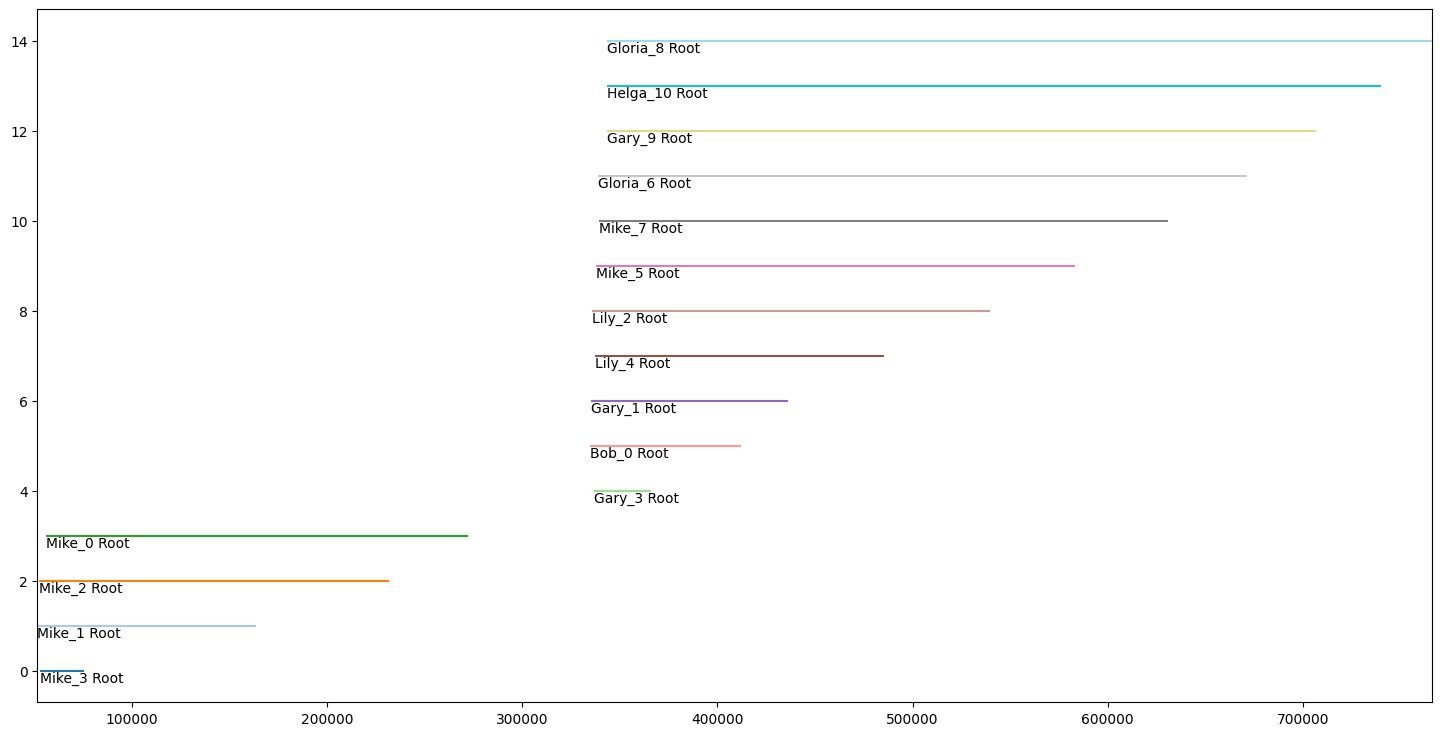

In [82]:

# For each patient, get a timeline of every reference on or before engagement
color_cycler = nu.get_color_cycler(len(patient_engagements_df.patient_id.unique()))
hlineys_list = []
hlinexmins_list = []
hlinexmaxs_list = []
hlinecolors_list = []
hlinelabels_list = []
left_lim = 999999
right_lim = -999999
for (row_index, row_series), (y, face_color_dict) in zip(patient_engagements_df.iterrows(), enumerate(color_cycler())):
    hlineys_list.append(y)
    face_color = face_color_dict['color']
    hlinecolors_list.append(face_color)
    patient_id = row_series.patient_id
    hlinelabels_list.append(patient_id)
    action_tick = row_series.action_tick
    event_time = row_series.event_time
    mask_series = (frvrs_logs_df.patient_id == patient_id)
    mask_series &= (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.scene_id == 0)
    mask_series &= (frvrs_logs_df.action_tick <= action_tick) & (frvrs_logs_df.event_time <= event_time)
    df = frvrs_logs_df[mask_series].sort_values(['event_time', 'action_tick'])
    if (patient_id == 'Gary_3 Root'): gary_df = df.copy()
    xmin = fu.get_scene_start(df)
    hlinexmins_list.append(xmin)
    if xmin < left_lim: left_lim = xmin
    xmax = df.action_tick.max()
    hlinexmaxs_list.append(xmax)
    if xmax > right_lim: right_lim = xmax
ax = plt.figure(figsize=(18, 9)).add_subplot(1, 1, 1)
ax.set_xlim(left_lim, right_lim)
line_collection_obj = ax.hlines(hlineys_list, hlinexmins_list, hlinexmaxs_list, colors=hlinecolors_list)
for label, x, y in zip(hlinelabels_list, hlinexmins_list, hlineys_list):
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, -8), ha='left')


When the *PATIENT_DEMOTED* type action happens, it means only that the status of a patient has changed. This happens when the scene first loads and the initial patient status is calculated. Over time, of the patient is not attended to, the status will degrade and the PATIENT_DEMOTED metric is issued.

In [90]:

# Display the shortest timeline (Gary_3 Root's)
# mask_series = (gary_df.action_type == 'PATIENT_DEMOTED')
mask_series = gary_df.action_type.isin([
    'PATIENT_ENGAGED', 'INJURY_TREATED'
] + fu.responder_negotiations_list)
action_tick = fu.get_scene_start(gary_df[mask_series])
event_time = gary_df[mask_series].event_time.min()
mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.scene_id == 0)
mask_series &= (frvrs_logs_df.action_tick <= action_tick) & (frvrs_logs_df.event_time <= event_time)
columns_list = [
    'action_type', 'action_tick', 'event_time', 'voice_capture_message', 'voice_command_message', 'patient_demoted_salt',
    'patient_id', 'location_id'
]
display(frvrs_logs_df[mask_series][columns_list].tail(20).dropna(axis='columns', how='all'))

action_type  action_tick          event_time  \
11528  S_A_L_T_WALK_IF_CAN        359626 2023-05-16 16:21:00   
11529       S_A_L_T_WALKED        359626 2023-05-16 16:21:00   
11530        VOICE_CAPTURE        359774 2023-05-16 16:21:00   
11531        VOICE_COMMAND        359774 2023-05-16 16:21:00   
11532  S_A_L_T_WAVE_IF_CAN        359775 2023-05-16 16:21:00   
11533  S_A_L_T_WAVE_IF_CAN        359775 2023-05-16 16:21:00   
11534  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11535  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11536  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11537  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11538  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11539  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11540       S_A_L_T_WALKED        359791 2023-05-16 16:21:00   
11541  S_A_L_T_WALK_IF_CAN        359791 2023-05-16 16:21:00   
11542       S_A_L_T_WALKED        359791 2023-05-16 16:21:00   
11543             TELEPORT        362739 2023-05-16 16:21:00   
11544             TELEPORT        364310 2023-05-16 16:21:00   
11545             TELEPORT        364910 2023-05-16 16:21:00   
11546             TELEPORT        365613 2023-05-16 16:21:00   
11547      PATIENT_ENGAGED        365761 2023-05-16 16:21:00   

         voice_capture_message voice_command_message     patient_id  \
11528                      NaN                   NaN  Helga_10 Root   
11529                      NaN                   NaN  Helga_10 Root   
11530  wave if you can hear me                   NaN            NaN   
11531                      NaN       wave if you can            NaN   
11532                      NaN                   NaN  Gloria_8 Root   
11533                      NaN                   NaN  Helga_10 Root   
11534                      NaN                   NaN    Lily_2 Root   
11535                      NaN                   NaN    Lily_4 Root   
11536                      NaN                   NaN    Mike_5 Root   
11537                      NaN                   NaN  Gloria_6 Root   
11538                      NaN                   NaN    Mike_7 Root   
11539                      NaN                   NaN  Gloria_8 Root   
11540                      NaN                   NaN  Gloria_8 Root   
11541                      NaN                   NaN  Helga_10 Root   
11542                      NaN                   NaN  Helga_10 Root   
11543                      NaN                   NaN            NaN   
11544                      NaN                   NaN            NaN   
11545                      NaN                   NaN            NaN   
11546                      NaN                   NaN            NaN   
11547                      NaN                   NaN    Gary_3 Root   

            location_id  
11528   (2.4, 0.0, 4.1)  
11529   (2.4, 0.0, 4.1)  
11530               NaN  
11531               NaN  
11532   (4.0, 0.0, 2.3)  
11533   (2.3, 0.0, 4.0)  
11534   (3.0, 0.0, 4.5)  
11535   (1.2, 0.0, 6.2)  
11536   (2.7, 0.0, 2.3)  
11537  (-1.2, 0.0, 3.1)  
11538   (1.3, 0.0, 3.4)  
11539   (4.0, 0.0, 2.3)  
11540   (4.0, 0.0, 2.3)  
11541   (2.3, 0.0, 4.0)  
11542   (2.3, 0.0, 4.0)  
11543  (2.0, 0.0, -1.7)  
11544   (0.7, 0.0, 0.8)  
11545   (0.7, 0.0, 0.9)  
11546   (0.7, 0.0, 1.0)  
11547   (0.4, 0.0, 1.7)

In [96]:

columns_list = [
    'action_type', 'action_tick', 'event_time', 'voice_capture_message', 'voice_command_message',
    'patient_demoted_salt', 'patient_id', 'location_id'
]
mask_series = (frvrs_logs_df.action_type == 'PATIENT_ENGAGED')
for (session_uuid, patient_id), patient_df in frvrs_logs_df[mask_series].sort_values(['event_time', 'action_tick']).groupby([
    'session_uuid', 'patient_id'
]):
    if patient_df.shape[0] > 1:
        for scene_id, scene_df in patient_df.groupby('scene_id'):
            # display(scene_df.dropna(axis='columns', how='all').T)
            mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.scene_id == scene_id)
            action_tick = fu.get_scene_start(scene_df); mask_series &= (frvrs_logs_df.action_tick <= action_tick)
            event_time = scene_df.event_time.min(); mask_series &= (frvrs_logs_df.event_time <= event_time)
            display(frvrs_logs_df[mask_series][columns_list].tail(20).dropna(axis='columns', how='all'))
        break

action_type  action_tick          event_time  \
698        VOICE_COMMAND        515895 2023-05-16 15:07:00   
699  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
700        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
701  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
702        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
703  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
704        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
705  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
706        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
707  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
708        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
709  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
710        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
711  S_A_L_T_WAVE_IF_CAN        515896 2023-05-16 15:07:00   
712        S_A_L_T_WAVED        515896 2023-05-16 15:07:00   
713        VOICE_CAPTURE        518155 2023-05-16 15:07:00   
714             TELEPORT        521025 2023-05-16 15:07:00   
715             TELEPORT        522411 2023-05-16 15:07:00   
716             TELEPORT        522788 2023-05-16 15:07:00   
717      PATIENT_ENGAGED        524656 2023-05-16 15:07:00   

    voice_capture_message voice_command_message     patient_id  \
698                   NaN       wave if you can            NaN   
699                   NaN                   NaN    Lily_2 Root   
700                   NaN                   NaN    Lily_2 Root   
701                   NaN                   NaN    Lily_4 Root   
702                   NaN                   NaN    Lily_4 Root   
703                   NaN                   NaN    Mike_5 Root   
704                   NaN                   NaN    Mike_5 Root   
705                   NaN                   NaN  Gloria_6 Root   
706                   NaN                   NaN  Gloria_6 Root   
707                   NaN                   NaN    Mike_7 Root   
708                   NaN                   NaN    Mike_7 Root   
709                   NaN                   NaN  Gloria_8 Root   
710                   NaN                   NaN  Gloria_8 Root   
711                   NaN                   NaN  Helga_10 Root   
712                   NaN                   NaN  Helga_10 Root   
713                    oh                   NaN            NaN   
714                   NaN                   NaN            NaN   
715                   NaN                   NaN            NaN   
716                   NaN                   NaN            NaN   
717                   NaN                   NaN     Bob_0 Root   

          location_id  
698               NaN  
699   (3.0, 0.0, 4.5)  
700   (3.0, 0.0, 4.5)  
701   (1.2, 0.0, 6.2)  
702   (1.2, 0.0, 6.2)  
703   (2.7, 0.0, 2.3)  
704   (2.7, 0.0, 2.3)  
705  (-1.2, 0.0, 3.1)  
706  (-1.2, 0.0, 3.1)  
707   (1.3, 0.0, 3.4)  
708   (1.3, 0.0, 3.4)  
709  (1.7, 0.0, -3.0)  
710  (1.7, 0.0, -3.0)  
711  (4.4, 0.0, -2.3)  
712  (4.4, 0.0, -2.3)  
713               NaN  
714   (0.6, 0.0, 7.3)  
715   (0.0, 0.0, 7.0)  
716   (0.0, 0.0, 7.0)  
717  (-1.7, 0.0, 5.6)

action_type  action_tick          event_time   patient_id  \
2737       TOOL_HOVER       1973831 2023-05-16 15:32:00          NaN   
2738       TOOL_HOVER       1973847 2023-05-16 15:32:00          NaN   
2739       TOOL_HOVER       1973864 2023-05-16 15:32:00          NaN   
2740       TOOL_HOVER       1973882 2023-05-16 15:32:00          NaN   
2741       TOOL_HOVER       1974292 2023-05-16 15:32:00          NaN   
2742       TOOL_HOVER       1974299 2023-05-16 15:32:00          NaN   
2743       TOOL_HOVER       1974317 2023-05-16 15:32:00          NaN   
2744       TOOL_HOVER       1974333 2023-05-16 15:32:00          NaN   
2745       TOOL_HOVER       1974352 2023-05-16 15:32:00          NaN   
2746       TOOL_HOVER       1974371 2023-05-16 15:32:00          NaN   
2747    TOOL_SELECTED       1974372 2023-05-16 15:32:00          NaN   
2748   INJURY_TREATED       1976493 2023-05-16 15:32:00  Gary_3 Root   
2749     TOOL_APPLIED       1976493 2023-05-16 15:32:00          NaN   
2750      PULSE_TAKEN       1976643 2023-05-16 15:32:00  Gary_3 Root   
2751      PULSE_TAKEN       1976824 2023-05-16 15:32:00  Gary_3 Root   
2752     TAG_SELECTED       1978125 2023-05-16 15:32:00          NaN   
2753      TAG_APPLIED       1979690 2023-05-16 15:32:00  Gary_3 Root   
2754       BAG_CLOSED       1981286 2023-05-16 15:32:00          NaN   
2755         TELEPORT       1981286 2023-05-16 15:32:00          NaN   
2756  PATIENT_ENGAGED       1990417 2023-05-16 15:32:00   Bob_0 Root   

           location_id  
2737               NaN  
2738               NaN  
2739               NaN  
2740               NaN  
2741               NaN  
2742               NaN  
2743               NaN  
2744               NaN  
2745               NaN  
2746               NaN  
2747               NaN  
2748   (0.0, 0.0, 0.0)  
2749               NaN  
2750               NaN  
2751               NaN  
2752               NaN  
2753               NaN  
2754   (0.6, 0.5, 0.9)  
2755  (-0.4, 0.0, 0.7)  
2756  (-1.7, 0.0, 5.6)

action_type  action_tick          event_time  \
4384         TOOL_APPLIED       2895748 2023-05-16 15:47:00   
4385        VOICE_CAPTURE       2901749 2023-05-16 15:47:00   
4386        VOICE_COMMAND       2901749 2023-05-16 15:47:00   
4387  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4388        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4389  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4390        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4391  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4392        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4393  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4394        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4395  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4396        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4397  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4398        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4399  S_A_L_T_WAVE_IF_CAN       2901751 2023-05-16 15:47:00   
4400        S_A_L_T_WAVED       2901751 2023-05-16 15:47:00   
4401           BAG_CLOSED       2904712 2023-05-16 15:47:00   
4402             TELEPORT       2904712 2023-05-16 15:47:00   
4403      PATIENT_ENGAGED       2915125 2023-05-16 15:47:00   

     voice_capture_message voice_command_message     patient_id  \
4384                   NaN                   NaN            NaN   
4385                  wave                   NaN            NaN   
4386                   NaN       wave if you can            NaN   
4387                   NaN                   NaN    Lily_2 Root   
4388                   NaN                   NaN    Lily_2 Root   
4389                   NaN                   NaN    Lily_4 Root   
4390                   NaN                   NaN    Lily_4 Root   
4391                   NaN                   NaN    Mike_5 Root   
4392                   NaN                   NaN    Mike_5 Root   
4393                   NaN                   NaN  Gloria_6 Root   
4394                   NaN                   NaN  Gloria_6 Root   
4395                   NaN                   NaN    Mike_7 Root   
4396                   NaN                   NaN    Mike_7 Root   
4397                   NaN                   NaN  Gloria_8 Root   
4398                   NaN                   NaN  Gloria_8 Root   
4399                   NaN                   NaN  Helga_10 Root   
4400                   NaN                   NaN  Helga_10 Root   
4401                   NaN                   NaN            NaN   
4402                   NaN                   NaN            NaN   
4403                   NaN                   NaN     Bob_0 Root   

           location_id  
4384               NaN  
4385               NaN  
4386               NaN  
4387   (3.0, 0.0, 4.5)  
4388   (3.0, 0.0, 4.5)  
4389   (1.2, 0.0, 6.2)  
4390   (1.2, 0.0, 6.2)  
4391   (2.7, 0.0, 2.3)  
4392   (2.7, 0.0, 2.3)  
4393  (-1.2, 0.0, 3.1)  
4394  (-1.2, 0.0, 3.1)  
4395   (1.3, 0.0, 3.4)  
4396   (1.3, 0.0, 3.4)  
4397  (4.5, 0.0, -1.3)  
4398  (4.5, 0.0, -1.3)  
4399  (3.5, 0.0, -2.8)  
4400  (3.5, 0.0, -2.8)  
4401   (1.2, 0.4, 1.3)  
4402   (0.2, 0.0, 0.8)  
4403  (-1.7, 0.0, 5.6)

In [18]:

def show_column_items(cn_str):
    for cn in frvrs_logs_df.columns:
        if cn_str in cn:
            uniques_list = [tool for tool in frvrs_logs_df[cn].unique().tolist() if notnull(tool)]
            if 1 < len(uniques_list) < 20:
                print()
                print(cn, '\n\t' + '\n\t'.join(sorted(uniques_list)))

In [19]:

show_column_items('location')


tool_applied_tool_location 
	cath_needle (UnityEngine.GameObject)
	tor_ring (1) (UnityEngine.GameObject)


In [20]:

show_column_items('tool')


tool_hover_type 
	Gauze
	Hemostatic Gauze
	Needle
	Tourniquet

tool_selected_type 
	Gauze
	Hemostatic Gauze
	Needle
	Tourniquet

tool_applied_type 
	Gauze_Dressing
	Gauze_Pack
	Needle
	Tourniquet

tool_applied_attachment_point 
	LChest_Breathe1 (UnityEngine.GameObject)
	LeftArm (UnityEngine.GameObject)
	LeftForeArm (UnityEngine.GameObject)
	LeftLeg (UnityEngine.GameObject)
	LeftUpLeg (UnityEngine.GameObject)
	RChest_Breathe1 (UnityEngine.GameObject)
	RightArm (UnityEngine.GameObject)
	RightForeArm (UnityEngine.GameObject)
	RightLeg (UnityEngine.GameObject)
	RightUpLeg (UnityEngine.GameObject)
	Spine1 (UnityEngine.GameObject)
	skinCollider_BodyCollideLOD (UnityEngine.GameObject)
	skinCollider_BodyGar_LOD (UnityEngine.GameObject)
	skinCollider_BodyLOD (UnityEngine.GameObject)
	skinCollider_Body_LOD (UnityEngine.GameObject)

tool_applied_tool_location 
	cath_needle (UnityEngine.GameObject)
	tor_ring (1) (UnityEngine.GameObject)

tool_applied_data 
	left_chest
	left_underarm
	right_chest


In [21]:

show_column_items('type')


tool_hover_type 
	Gauze
	Hemostatic Gauze
	Needle
	Tourniquet

tool_selected_type 
	Gauze
	Hemostatic Gauze
	Needle
	Tourniquet

tool_applied_type 
	Gauze_Dressing
	Gauze_Pack
	Needle
	Tourniquet

tag_selected_type 
	black
	gray
	green
	red
	yellow

tag_applied_type 
	black
	gray
	green
	red
	yellow

tag_discarded_type 
	black
	gray
	green
	red
	yellow

tool_discarded_type 
	Gauze
	Hemostatic Gauze
	Needle
	Tourniquet


In [22]:

show_column_items('applied')


tool_applied_type 
	Gauze_Dressing
	Gauze_Pack
	Needle
	Tourniquet

tool_applied_attachment_point 
	LChest_Breathe1 (UnityEngine.GameObject)
	LeftArm (UnityEngine.GameObject)
	LeftForeArm (UnityEngine.GameObject)
	LeftLeg (UnityEngine.GameObject)
	LeftUpLeg (UnityEngine.GameObject)
	RChest_Breathe1 (UnityEngine.GameObject)
	RightArm (UnityEngine.GameObject)
	RightForeArm (UnityEngine.GameObject)
	RightLeg (UnityEngine.GameObject)
	RightUpLeg (UnityEngine.GameObject)
	Spine1 (UnityEngine.GameObject)
	skinCollider_BodyCollideLOD (UnityEngine.GameObject)
	skinCollider_BodyGar_LOD (UnityEngine.GameObject)
	skinCollider_BodyLOD (UnityEngine.GameObject)
	skinCollider_Body_LOD (UnityEngine.GameObject)

tool_applied_tool_location 
	cath_needle (UnityEngine.GameObject)
	tor_ring (1) (UnityEngine.GameObject)

tool_applied_data 
	left_chest
	left_underarm
	right_chest
	right_underarm
	tourniquet(Clone) (UnityEngine.GameObject)

tool_applied_sender 
	AppliedDressingGauze
	AppliedPackingGauze
	App

In [ ]:

frvrs_logs_df.tag_applied_patient_id.unique()

In [ ]:

frvrs_logs_df.injury_treated_id.unique()

In [ ]:

frvrs_logs_df.injury_record_id.unique()

In [ ]:

# 'action_type', 
action_types_list = ['VOICE_COMMAND', 'PATIENT_ENGAGED']
columns_list += [cn for cn in frvrs_logs_df.columns if any(map(lambda x: cn.startswith(x.lower()), action_types_list))]
[fn for fn in dir(df) if fn.startswith('to')]

In [ ]:

df.to_csv('../saves/csv/time_group0.csv')


## Game Object References

In [4]:

def investigate_game_object(search_str, columns_list=None):
    '''
    Investigate the presence of search_str and
    make a list of all search_str references
    '''
    if columns_list is None:
        clean_csvs_srs = frvrs_logs_df.applymap(lambda x: search_str in str(x), na_action='ignore').sum()
        columns_list = clean_csvs_srs[clean_csvs_srs != 0].index.tolist()
    sample_mask_series = False
    references_list = []
    for cn in columns_list:
        mask_series = frvrs_logs_df[cn].map(lambda x: search_str in str(x))
        sample_mask_series |= mask_series
        references_list.extend(frvrs_logs_df[mask_series][cn].unique().tolist())
    print(columns_list, set(references_list))
    df = frvrs_logs_df[sample_mask_series].dropna(axis='columns', how='all')
    display(df.sample(4).T.dropna(axis='index', how='all'))


### UnityEngine.GameObject References

In [ ]:

# Investigate the presence of unity engine game objects
investigate_game_object('Unity')


### "Needle" References

In [ ]:

# Investigate the presence of needles
investigate_game_object('Needle')


### "Hemostatic" References

In [ ]:

# Investigate the presence of hemostatic gauze
investigate_game_object('Hemostatic')


### "Tourniquet" References

In [5]:

# Investigate the presence of tourniquets
investigate_game_object('Tourniquet')

['voice_capture_message', 'tool_hover_type', 'tool_selected_type', 'tool_applied_type', 'tool_applied_sender', 'tool_discarded_type'] {'AppliedTourniquet', 'Tourniquet'}


130324  \
action_type                                 TOOL_SELECTED   
action_tick                                        85541   
event_time                            2023-04-21 09:28:00   
session_uuid         87efcdf5-9090-4fa5-afac-25c778924e9a   
file_name                                           max10   
scene_id                                              1   
tool_hover_type                                       NaN   
tool_hover_count                                      NaN   
tool_selected_type                             Tourniquet   
tool_selected_count                                   998   

                                                   62796   \
action_type                                    TOOL_HOVER   
action_tick                                       240165   
event_time                            2023-05-11 09:36:00   
session_uuid         3817ac9f-7150-46de-80aa-1b376f6c8a62   
file_name            3817ac9f-7150-46de-80aa-1b376f6c8a62   
scene_id                                              1   
tool_hover_type                                Tourniquet   
tool_hover_count                                      998   
tool_selected_type                                    NaN   
tool_selected_count                                   NaN   

                                                   122496  \
action_type                                    TOOL_HOVER   
action_tick                                       701531   
event_time                            2023-06-07 08:48:00   
session_uuid         e072d31f-2592-4c7e-8709-3db1e111240c   
file_name            e072d31f-2592-4c7e-8709-3db1e111240c   
scene_id                                              2   
tool_hover_type                                Tourniquet   
tool_hover_count                                      996   
tool_selected_type                                    NaN   
tool_selected_count                                   NaN   

                                                   136150  
action_type                                    TOOL_HOVER  
action_tick                                       744438  
event_time                            2023-04-21 11:27:00  
session_uuid         8b5e760a-1f1a-4a28-bd8f-768bc5f216c6  
file_name                                           max13  
scene_id                                              2  
tool_hover_type                                Tourniquet  
tool_hover_count                                      995  
tool_selected_type                                    NaN  
tool_selected_count                                   NaN

In [22]:

# Investigate the presence of forearms
srs = frvrs_logs_df.applymap(lambda x: 'forearm' in str(x).lower(), na_action='ignore').sum()
columns_list = srs[srs != 0].index.tolist()
columns_list

['injury_record_id', 'voice_capture_message', 'injury_treated_id', 'tool_applied_attachment_point']

In [ ]:

# Investigate the presence of hemorrhage control
srs = frvrs_logs_df.applymap(lambda x: str(x) in ['AppliedTourniquet', 'AppliedPackingGauze'], na_action='ignore').sum()
columns_list = srs[srs != 0].index.tolist()
columns_list